# I. World Population 2019

https://www.kaggle.com/cityapiio/countries-population-2010-2020-data

<p style="align: left;"><img align=left src="http://abali.ru/wp-content/uploads/2013/03/shar_pokrytij_flagami_mira1.png"  width=330></p>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from pylab import rcParams
rcParams['figure.figsize'] = 18,5
from scipy import stats as st
import seaborn as sns

In [3]:
df1 = pd.read_csv('countries_general_info_historical.24-10-2021.csv')

df1.drop(df1.columns[[2, 3, 5, 6]], axis=1, inplace=True)
df1.rename(columns = {
    df1.columns[0]: 'Country',
    df1.columns[2]: 'Code',
    df1.columns[3]: 'Pop2010',
    df1.columns[4]: 'Pop2011',
    df1.columns[5]: 'Pop2012',
    df1.columns[6]: 'Pop2013',
    df1.columns[7]: 'Pop2014',
    df1.columns[8]: 'Pop2015',
    df1.columns[9]: 'Pop2016',
    df1.columns[10]: 'Pop2017',
    df1.columns[11]: 'Pop2018',
    df1.columns[12]: 'Pop2019',
}, inplace = True)

df_round = round(df1.iloc[:, 3:] / 1000000, 3)

df2 = df1[['Country', 'NativeName', 'Code']].join(df_round, how='left')

df3 = pd.read_csv('population_2021.csv')

df3.drop(df3.columns[[1, 2, 3]], axis=1, inplace=True)

df4 = df2.merge(df3, how='left', on='Country')

df4.loc[df4.Country.isin(['United Kingdom', 'Andorra', 'Monaco', 'San Marino', 'Liechtenstein', 'Moldova',\
                          'Kingdom of the Netherlands', 'Danish Realm']), 'Continent'] = 'Europe'
df4.loc[df4.Country.isin(["People's Republic of China", 'North Korea', 'Iran', 'Laos', 'Syria', 'Vietnam',\
                          'Brunei']), 'Continent'] = 'Asia'
df4.loc[df4.Country.isin(['Tuvalu', 'Palau', 'Nauru', 'Marshall Islands', 'Federated States of Micronesia']),\
                          'Continent'] = 'Oceania'
df4.loc[df4.Country.isin(['Saint Kitts and Nevis', 'Venezuela', 'Bolivia', 'The Bahamas', 'Dominica']),\
                          'Continent'] = 'South America'
df4.loc[df4.Country.isin(['Tanzania', 'Republic of the Congo', 'The Gambia', "Cote d'Ivoire", 'Cape Verde']),\
                          'Continent'] = 'Africa'
df4 = df4[['Country', 'NativeName', 'Code', 'Continent', 'Pop2010', 'Pop2011', 'Pop2012', 'Pop2013', 'Pop2014', 'Pop2015',\
           'Pop2016', 'Pop2017', 'Pop2018', 'Pop2019']]

df4.iloc[161, 6:14] = 3.2

df4['Gr2011'] = df4['Pop2011'] - df4['Pop2010']
df4['Gr2012'] = df4['Pop2012'] - df4['Pop2011']
df4['Gr2013'] = df4['Pop2013'] - df4['Pop2012']
df4['Gr2014'] = df4['Pop2014'] - df4['Pop2013']
df4['Gr2015'] = df4['Pop2015'] - df4['Pop2014']
df4['Gr2016'] = df4['Pop2016'] - df4['Pop2015']
df4['Gr2017'] = df4['Pop2017'] - df4['Pop2016']
df4['Gr2018'] = df4['Pop2018'] - df4['Pop2017']
df4['Gr2019'] = df4['Pop2019'] - df4['Pop2018']

df4['GrTotal'] = df4.iloc[:, 14:].sum(axis=1)
df4['GrPerc'] = round(df4['GrTotal'] / df4['Pop2010'] * 100, 1)

df4.head()

,Country,NativeName,Code,Continent,Pop2010,Pop2011,Pop2012,Pop2013,Pop2014,Pop2015,...,Gr2012,Gr2013,Gr2014,Gr2015,Gr2016,Gr2017,Gr2018,Gr2019,GrTotal,GrPerc
0,Canada,Canada,CAN,North America,34.005,34.339,34.714,35.083,35.437,35.703,...,0.375,0.369,0.354,0.266,0.406,0.436,0.520,0.528,3.588,10.6
1,Japan,日本,JPN,Asia,128.070,127.833,127.629,127.445,127.276,127.141,...,-0.204,-0.184,-0.169,-0.135,-0.146,-0.209,-0.257,-0.264,-1.805,-1.4
2,Norway,Kongeriket Norge,NOR,Europe,4.889,4.953,5.019,5.080,5.137,5.189,...,0.066,0.061,0.057,0.052,0.046,0.042,0.035,0.036,0.459,9.4
3,Ireland,Eire,IRL,Europe,4.560,4.580,4.600,4.624,4.658,4.702,...,0.020,0.024,0.034,0.044,0.053,0.052,0.060,0.067,0.374,8.2
4,Hungary,Magyarorszag,HUN,Europe,10.000,9.972,9.920,9.893,9.866,9.843,...,-0.052,-0.027,-0.027,-0.023,-0.029,-0.026,-0.012,-0.005,-0.229,-2.3


## 1. Страны, их количество и распределение по континентам

In [3]:
countries = df4[['Country', 'NativeName', 'Code', 'Continent']]
countries

,Country,NativeName,Code,Continent
0,Canada,Canada,CAN,North America
1,Japan,日本,JPN,Asia
2,Norway,Kongeriket Norge,NOR,Europe
3,Ireland,Eire,IRL,Europe
4,Hungary,Magyarorszag,HUN,Europe
...,...,...,...,...
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa
188,Sudan,جمهورية السودان,SDN,Africa
189,Eswatini,Umbuso weSwatini,SWZ,Africa
190,Kingdom of the Netherlands,Koninkrijk der Nederlanden,NLD,Europe


In [4]:
# Общее количество стран на Земле
print('Количество стран на Земле:', countries.Country.count())

Количество стран на Земле: 192


### Распределение стран по континентам

In [5]:
# Распределение количества стран на Земле, по континентам
distribution_countries_continents = countries['Continent'].value_counts().reset_index()
distribution_countries_continents.columns = ['Continent', 'Count']
distribution_countries_continents

,Continent,Count
0,Africa,53
1,Asia,47
2,Europe,43
3,North America,20
4,South America,15
5,Oceania,14


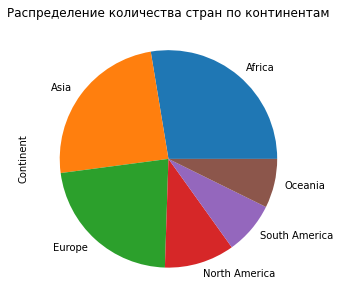

In [6]:
# Распределение количества стран на Земле, по континентам
pie_distribution_countries_continents = countries['Continent'].value_counts().sort_values(ascending = False)
pie_distribution_countries_continents.plot(kind='pie', title='Распределение количества стран по континентам')
rcParams['figure.figsize'] = 14,5

Text(0.5, 1.0, 'Distribution of quantity of countries by continents (Распределение количества стран по континентам)')

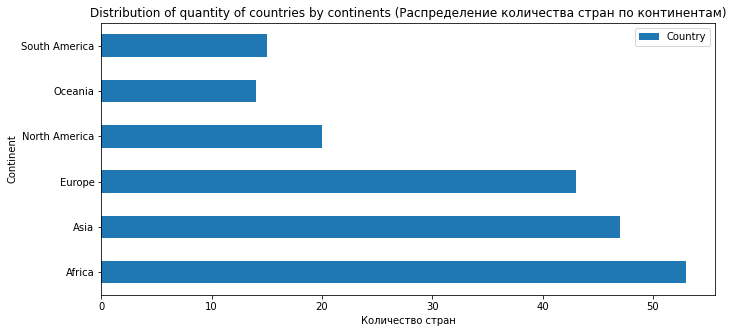

In [7]:
barh_distribution_countries_continents = countries[['Continent', 'Country']].groupby('Continent').count().sort_values('Continent', ascending=True)
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
barh_distribution_countries_continents.plot(kind='barh', ax=ax)
ax.set_xlabel('Количество стран')
ax.set_title('Distribution of quantity of countries by continents (Распределение количества стран по континентам)')

## 2. Популяция Земли на 2019 г.

In [8]:
population_2019 = df4[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
population_2019.head()

,Country,NativeName,Code,Continent,Pop2019
0,Canada,Canada,CAN,North America,37.593
1,Japan,日本,JPN,Asia,126.265
2,Norway,Kongeriket Norge,NOR,Europe,5.348
3,Ireland,Eire,IRL,Europe,4.934
4,Hungary,Magyarorszag,HUN,Europe,9.771


In [9]:
print('Общее количество населения Земли: ', int(population_2019['Pop2019'].sum() * 1000), 'или',\
      round(population_2019['Pop2019'].sum() / 1000, 1), 'млрд. человек')

Общее количество населения Земли:  7615424 или 7.6 млрд. человек


In [10]:
print(f"Общее количество населения Земли: {int(population_2019['Pop2019'].sum() * 1000)} или {round(population_2019['Pop2019'].sum() / 1000, 1)} млрд. человек")

Общее количество населения Земли: 7615424 или 7.6 млрд. человек


In [11]:
# Страна с максимальной популяцией в 2019г. (млн. человек)
population_2019.query('Pop2019 == {}'.format(population_2019['Pop2019'].max()))[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]

,Country,NativeName,Code,Continent,Pop2019
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715


In [12]:
# Страна с минимальной популяцией в 2019г. (млн. человек)
population_2019.query('Pop2019 == {}'.format(population_2019['Pop2019'].min()))[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]

,Country,NativeName,Code,Continent,Pop2019
77,Tuvalu,Tuvalu,TUV,Oceania,0.012


### Популяция континентов на 2019 г.

In [13]:
# Распределение населения Земли, на 2019г., по континентам (млн. человек)
distribution_population_continents = population_2019.groupby('Continent').sum()['Pop2019'].reset_index().sort_values('Pop2019', ascending=False)
distribution_population_continents.columns = ['Continent', 'Population']
distribution_population_continents

,Continent,Population
1,Asia,4529.576
0,Africa,1291.376
2,Europe,744.367
3,North America,580.911
5,South America,427.578
4,Oceania,41.616


Text(0.5, 1.0, 'Distribution of population by continents (Распределение населения Земли по континентам)')

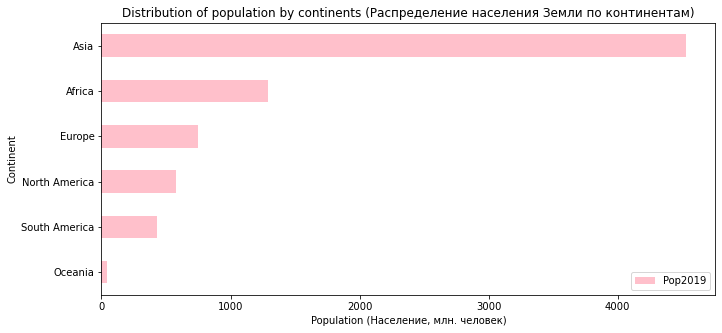

In [14]:
distribution_population_continents_barh = population_2019[['Continent', 'Pop2019']].groupby('Continent').sum().sort_values('Pop2019', ascending=True)
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
distribution_population_continents_barh.plot(kind='barh', ax=ax, color='pink')
ax.set_xlabel('Population (Население, млн. человек)')
ax.set_title('Distribution of population by continents (Распределение населения Земли по континентам)')

<AxesSubplot:title={'center':'Распределение популяции Земли по континентам'}, ylabel='Pop2019'>

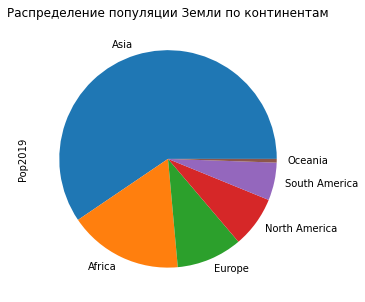

In [15]:
# Распределение популяции Земли, по континентам на 2019г.
distribution_population_continents_pie = pd.DataFrame(population_2019.groupby('Continent').Pop2019.sum()).sort_values('Pop2019', ascending=False)
distribution_population_continents_pie.plot.pie(y='Pop2019', figsize=(5, 5), title='Распределение популяции Земли по континентам', legend=False)

In [16]:
# Страны с максимальной популяцией по континентам в 2019г. (млн. человек)
series_index_max_populations_continents = population_2019.groupby('Continent').idxmax()['Pop2019']
countries_max_populations_continents = population_2019.loc[population_2019.index.isin(series_index_max_populations_continents)]\
                                                      .sort_values(by='Pop2019', ascending=False)
countries_max_populations_continents = countries_max_populations_continents[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
countries_max_populations_continents

,Country,NativeName,Code,Continent,Pop2019
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715
6,United States of America,United States of America,USA,North America,328.240
28,Brazil,Republica Federativa do Brasil,BRA,South America,211.050
180,Nigeria,Nijeriya,NGA,Africa,200.964
29,Russia,Россия,RUS,Europe,144.406
68,Australia,Australia,AUS,Oceania,25.366


In [17]:
# Страны с минимальной популяцией по континентам в 2019г. (млн. человек)
series_index_min_populations_continents = population_2019.groupby('Continent').idxmin()['Pop2019']
countries_min_populations_continents = population_2019.loc[population_2019.index.isin(series_index_min_populations_continents)]\
                                                      .sort_values(by='Pop2019', ascending=True)
countries_min_populations_continents = countries_min_populations_continents[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
countries_min_populations_continents

,Country,NativeName,Code,Continent,Pop2019
77,Tuvalu,Tuvalu,TUV,Oceania,0.012
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,0.034
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,0.053
105,Antigua and Barbuda,Antigua and Barbuda,ATG,North America,0.097
185,Seychelles,Republique des Seychelles,SYC,Africa,0.098
144,Brunei,Brunei,BRN,Asia,0.433


### Динамика популяции Земли c 2010 по 2019 г.г

In [18]:
population = df4[['Country', 'NativeName', 'Code', 'Continent', 'Pop2010', 'Pop2011', 'Pop2012', 'Pop2013', 'Pop2014',\
                  'Pop2015', 'Pop2016', 'Pop2017', 'Pop2018', 'Pop2019']]
population.head()

,Country,NativeName,Code,Continent,Pop2010,Pop2011,Pop2012,Pop2013,Pop2014,Pop2015,Pop2016,Pop2017,Pop2018,Pop2019
0,Canada,Canada,CAN,North America,34.005,34.339,34.714,35.083,35.437,35.703,36.109,36.545,37.065,37.593
1,Japan,日本,JPN,Asia,128.070,127.833,127.629,127.445,127.276,127.141,126.995,126.786,126.529,126.265
2,Norway,Kongeriket Norge,NOR,Europe,4.889,4.953,5.019,5.080,5.137,5.189,5.235,5.277,5.312,5.348
3,Ireland,Eire,IRL,Europe,4.560,4.580,4.600,4.624,4.658,4.702,4.755,4.807,4.867,4.934
4,Hungary,Magyarorszag,HUN,Europe,10.000,9.972,9.920,9.893,9.866,9.843,9.814,9.788,9.776,9.771


Text(0, 0.5, 'Популяция, млн. человек')

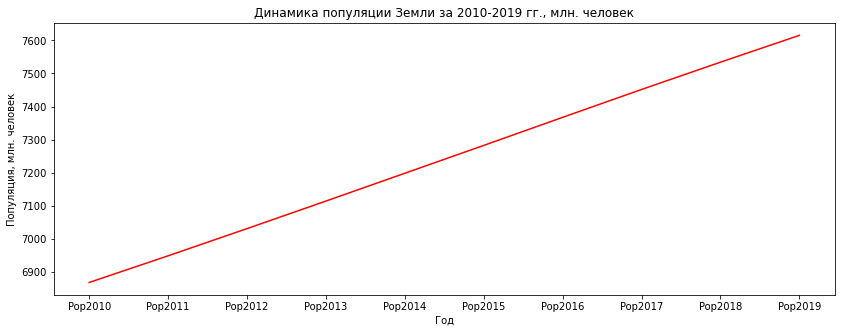

In [19]:
dynamics_population = population.iloc[:, 4:]
dynamics_population = dynamics_population.T
dynamics_population['Total'] = dynamics_population.iloc[:, 0:].sum(axis=1)
dynamics_population
plt.plot(dynamics_population.index, dynamics_population['Total'], c='r')
plt.title('Динамика популяции Земли за 2010-2019 гг., млн. человек')
plt.xlabel('Год')
plt.ylabel('Популяция, млн. человек')

In [20]:
# TOP-10 стран с наибольшей популяцией на 2010г.
population.sort_values(by='Pop2010', ascending=False).head(10)[['Country', 'NativeName', 'Code', 'Continent', 'Pop2010']]

,Country,NativeName,Code,Continent,Pop2010
27,People's Republic of China,中华人民共和国,CHN,Asia,1337.705
76,India,Republic of India,IND,Asia,1234.281
6,United States of America,United States of America,USA,North America,309.322
58,Indonesia,Republik Indonesia,IDN,Asia,241.834
28,Brazil,Republica Federativa do Brasil,BRA,South America,195.714
128,Pakistan,پاکستان,PAK,Asia,179.425
180,Nigeria,Nijeriya,NGA,Africa,158.503
140,Bangladesh,গণপ্রজাতন্ত্রী বাংলাদেশ,BGD,Asia,147.575
29,Russia,Россия,RUS,Europe,142.849
1,Japan,日本,JPN,Asia,128.070


In [21]:
# TOP-10 стран с наибольшей популяцией на 2019г.
population.sort_values(by='Pop2019', ascending=False).head(10)[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]

,Country,NativeName,Code,Continent,Pop2019
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715
76,India,Republic of India,IND,Asia,1366.418
6,United States of America,United States of America,USA,North America,328.240
58,Indonesia,Republik Indonesia,IDN,Asia,270.626
128,Pakistan,پاکستان,PAK,Asia,216.565
28,Brazil,Republica Federativa do Brasil,BRA,South America,211.050
180,Nigeria,Nijeriya,NGA,Africa,200.964
140,Bangladesh,গণপ্রজাতন্ত্রী বাংলাদেশ,BGD,Asia,163.046
29,Russia,Россия,RUS,Europe,144.406
21,Mexico,México,MEX,North America,127.576


In [22]:
# TOP-10 стран с наименьшей популяцией на 2010г.
population.sort_values(by='Pop2010', ascending=True).head(10)[['Country', 'NativeName', 'Code', 'Continent', 'Pop2010']]

,Country,NativeName,Code,Continent,Pop2010
84,Nauru,Ripublik Naoero,NRU,Oceania,0.010
77,Tuvalu,Tuvalu,TUV,Oceania,0.011
83,Palau,Republic of Palau,PLW,Oceania,0.018
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,0.031
52,Monaco,Principaute de Monaco,MCO,Europe,0.036
64,Liechtenstein,Liechtenstein,LIE,Europe,0.036
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,0.049
86,Marshall Islands,Aolepān Aorōkin M̧ajeļ,MHL,Oceania,0.056
107,Dominica,Commonwealth of Dominica,DMA,South America,0.071
47,Andorra,Andorra,AND,Europe,0.084


In [23]:
# TOP-10 стран с наименьшей популяцией на 2019г.
population.sort_values(by='Pop2019', ascending=True).head(10)[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]

,Country,NativeName,Code,Continent,Pop2019
77,Tuvalu,Tuvalu,TUV,Oceania,0.012
84,Nauru,Ripublik Naoero,NRU,Oceania,0.013
83,Palau,Republic of Palau,PLW,Oceania,0.018
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,0.034
64,Liechtenstein,Liechtenstein,LIE,Europe,0.038
52,Monaco,Principaute de Monaco,MCO,Europe,0.039
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,0.053
86,Marshall Islands,Aolepān Aorōkin M̧ajeļ,MHL,Oceania,0.059
107,Dominica,Commonwealth of Dominica,DMA,South America,0.072
47,Andorra,Andorra,AND,Europe,0.077


### Динамика популяции континентов с 2010 по 2019 г.г

In [24]:
dynamic_population_continents = population.groupby('Continent').sum().reset_index().T
dynamic_population_continents.rename(columns = { 
    dynamic_population_continents.columns[0]: 'Africa',
    dynamic_population_continents.columns[1]: 'Asia',
    dynamic_population_continents.columns[2]: 'Europe',
    dynamic_population_continents.columns[3]: 'Northern America',
    dynamic_population_continents.columns[4]: 'Oceania',
    dynamic_population_continents.columns[5]: 'South America'
}, inplace = True)
dynamic_population_continents = dynamic_population_continents.iloc[1:, 0:]
dynamic_population_continents

,Africa,Asia,Europe,Northern America,Oceania,South America
Pop2010,1025.08,4143.35,734.075,536.313,35.909,392.676
Pop2011,1051.97,4187.66,733.745,541.452,36.439,396.752
Pop2012,1079.61,4231.29,735.004,546.652,37.041,400.799
Pop2013,1108.03,4274.85,736.755,551.714,37.656,404.806
Pop2014,1137.12,4318.45,738.49,556.874,38.263,408.764
Pop2015,1166.85,4361.79,740.171,561.942,38.889,412.652
Pop2016,1197.17,4405.21,741.731,567.083,39.565,416.471
Pop2017,1228.08,4448.31,742.798,571.952,40.275,420.226
Pop2018,1259.51,4489.75,743.59,576.524,40.948,423.92
Pop2019,1291.38,4529.58,744.367,580.911,41.616,427.578


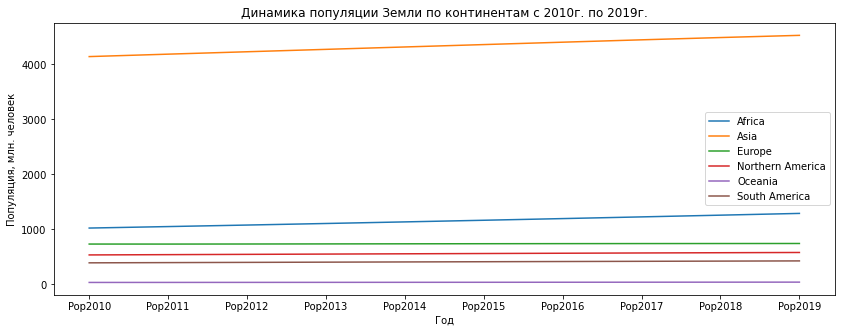

In [25]:
for continent in dynamic_population_continents.columns:
    plt.plot(dynamic_population_continents.index, dynamic_population_continents[continent])
plt.title('Динамика популяции Земли по континентам с 2010г. по 2019г.')
plt.xlabel('Год')
plt.ylabel('Популяция, млн. человек') 
plt.legend(dynamic_population_continents)

<AxesSubplot:title={'center':'Динамика популяции Земли по континентам с 2010г. по 2019г.'}, xlabel='Год', ylabel='Популяция, млн. человек'>

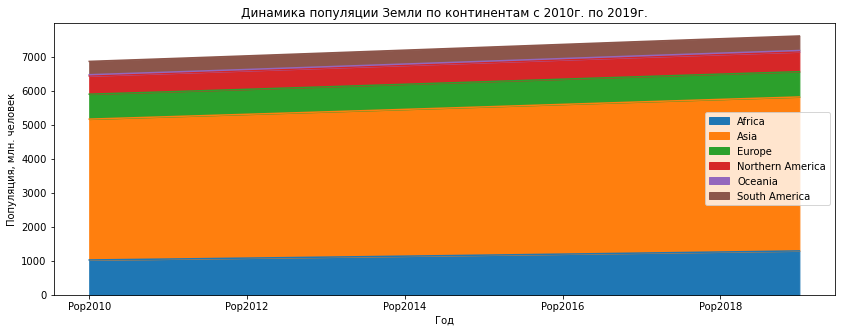

In [26]:
dynamic_population_continents.plot(kind='area',
                             title='Динамика популяции Земли по континентам с 2010г. по 2019г.', 
                             xlabel='Год', 
                             #stacked=False,
                             ylabel='Популяция, млн. человек')

<AxesSubplot:title={'center':'Динамика популяции Земли по континентам с 2010 по 2019 г.г.'}>

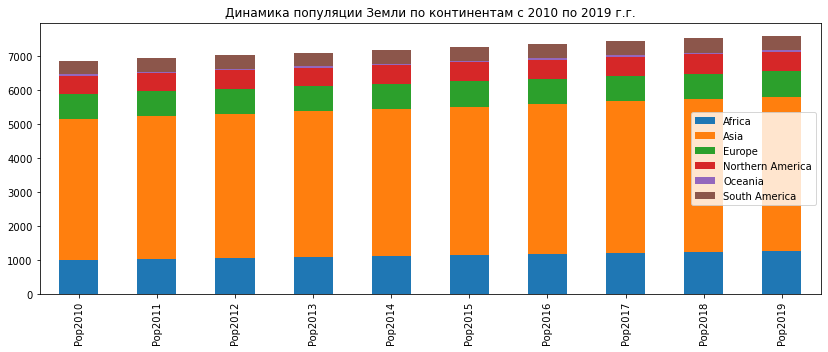

In [28]:
dynamic_population_continents.plot(kind='bar', 
                                   title='Динамика популяции Земли по континентам с 2010 по 2019 г.г.',
                                   stacked=True)

## 3. Прирост населения Земли с 2010 по 2019 г.г

In [29]:
growth = df4[['Country', 'NativeName', 'Code', 'Continent', 'Gr2011', 'Gr2012', 'Gr2013', 'Gr2014', 'Gr2015', 'Gr2016',\
              'Gr2017', 'Gr2018', 'Gr2019', 'GrTotal', 'GrPerc']]
growth.head()

,Country,NativeName,Code,Continent,Gr2011,Gr2012,Gr2013,Gr2014,Gr2015,Gr2016,Gr2017,Gr2018,Gr2019,GrTotal,GrPerc
0,Canada,Canada,CAN,North America,0.334,0.375,0.369,0.354,0.266,0.406,0.436,0.520,0.528,3.588,10.6
1,Japan,日本,JPN,Asia,-0.237,-0.204,-0.184,-0.169,-0.135,-0.146,-0.209,-0.257,-0.264,-1.805,-1.4
2,Norway,Kongeriket Norge,NOR,Europe,0.064,0.066,0.061,0.057,0.052,0.046,0.042,0.035,0.036,0.459,9.4
3,Ireland,Eire,IRL,Europe,0.020,0.020,0.024,0.034,0.044,0.053,0.052,0.060,0.067,0.374,8.2
4,Hungary,Magyarorszag,HUN,Europe,-0.028,-0.052,-0.027,-0.027,-0.023,-0.029,-0.026,-0.012,-0.005,-0.229,-2.3


In [30]:
# Страна с максимальным приростом популяции (в рамках общей популяции, в абсолютном значении) за период 2010-2019 г.г.
growth.query('GrTotal == {}'.format(growth['GrTotal'].max()))[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal']]#, 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal
76,India,Republic of India,IND,Asia,132.137


In [31]:
# Страна с минимальным приростом популяции (с максимальной убылью населения, в рамках общей популяции, в абсолютном значении)
# за период 2010-2019 г.г.
growth.query('GrTotal == {}'.format(growth['GrTotal'].min()))[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal']]#, 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal
132,Syria,الجمهورية العربية السورية,SYR,Asia,-4.293


In [32]:
# Страны с максимальным приростом населения по континентам в 2019г. (млн. человек)
series_index_max_growths_continents = growth.groupby('Continent').idxmax()['GrTotal']
countries_max_growths_continents = growth.loc[growth.index.isin(series_index_max_growths_continents)]\
                                                      .sort_values(by='GrTotal', ascending=False)
countries_max_growths_continents = countries_max_growths_continents[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal']]
countries_max_growths_continents

,Country,NativeName,Code,Continent,GrTotal
76,India,Republic of India,IND,Asia,132.137
180,Nigeria,Nijeriya,NGA,Africa,42.461
6,United States of America,United States of America,USA,North America,18.918
28,Brazil,Republica Federativa do Brasil,BRA,South America,15.336
26,United Kingdom,United Kingdom of Great Britain and Northern I...,GBR,Europe,4.070
68,Australia,Australia,AUS,Oceania,3.334


In [33]:
# Страны с минимальным приростом населения по континентам в 2019г. (млн. человек)
series_index_min_growths_continents = growth.groupby('Continent').idxmin()['GrTotal']
countries_min_growths_continents = growth.loc[growth.index.isin(series_index_min_growths_continents)]\
                                                      .sort_values(by='GrTotal', ascending=True)
countries_min_growths_continents = countries_min_growths_continents[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal']]
countries_min_growths_continents

,Country,NativeName,Code,Continent,GrTotal
132,Syria,الجمهورية العربية السورية,SYR,Asia,-4.293
35,Ukraine,Україна,UKR,Europe,-1.485
78,Tonga,Tonga,TON,Oceania,0.000
107,Dominica,Commonwealth of Dominica,DMA,South America,0.001
98,Saint Vincent and the Grenadines,Saint Vincent and the Grenadines,VCT,North America,0.003
185,Seychelles,Republique des Seychelles,SYC,Africa,0.008


### Динамика прироста населения Земли c 2010 по 2019 г.г

In [34]:
dynamic_growth_population = growth.iloc[:, 4:-2]
dynamic_growth_population = dynamic_growth_population.T
dynamic_growth_population['Total'] = dynamic_growth_population.iloc[:, 0:].sum(axis=1)
dynamic_growth_population

,0,1,2,3,4,5,6,7,8,9,...,183,184,185,186,187,188,189,190,191,Total
Gr2011,0.334,-0.237,0.064,0.020,-0.028,0.166,2.235,0.142,0.011,0.025,...,0.005,0.356,-0.003,0.147,0.332,0.805,0.007,0.078,0.023,80.609
Gr2012,0.375,-0.204,0.066,0.020,-0.052,0.030,2.274,0.069,0.013,0.026,...,0.003,0.368,0.001,0.150,0.340,0.844,0.007,0.062,0.021,82.378
Gr2013,0.369,-0.184,0.061,0.024,-0.027,-0.153,2.163,0.052,0.012,0.025,...,0.004,0.380,0.002,0.151,0.348,0.879,0.008,0.049,0.023,83.411
Gr2014,0.354,-0.169,0.057,0.034,-0.027,-0.139,2.307,0.050,0.013,0.023,...,0.004,0.393,0.001,0.153,0.360,0.905,0.008,0.061,0.028,84.164
Gr2015,0.266,-0.135,0.052,0.044,-0.023,-0.036,2.334,0.065,0.014,0.018,...,0.003,0.403,0.002,0.155,0.373,0.925,0.009,0.075,0.040,84.320
Gr2016,0.406,-0.146,0.046,0.053,-0.029,0.039,2.306,0.057,0.012,0.015,...,0.004,0.416,0.002,0.157,0.389,0.944,0.010,0.090,0.045,84.947
Gr2017,0.436,-0.209,0.042,0.052,-0.026,0.109,2.045,0.044,0.014,0.013,...,0.004,0.425,0.001,0.159,0.403,0.966,0.011,0.101,0.037,84.406
Gr2018,0.520,-0.257,0.035,0.060,-0.012,0.205,1.702,0.052,0.012,0.008,...,0.004,0.435,0.001,0.162,0.419,0.989,0.011,0.101,0.029,82.600
Gr2019,0.528,-0.264,0.036,0.067,-0.005,0.336,1.552,0.076,0.012,0.006,...,0.004,0.442,0.001,0.163,0.435,1.011,0.012,0.113,0.020,81.180


Text(0, 0.5, 'Прирост, млн. человек')

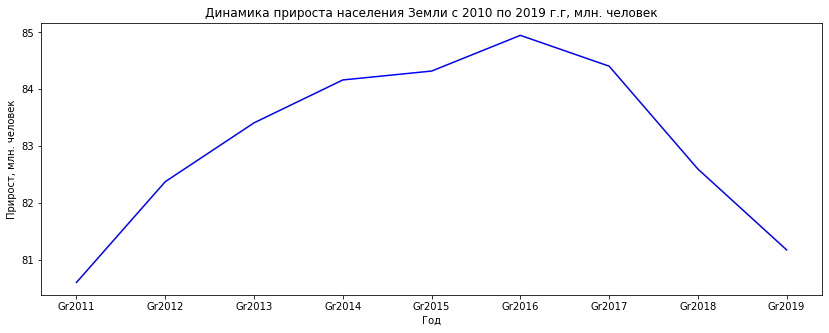

In [35]:
plt.plot(dynamic_growth_population.index, dynamic_growth_population['Total'], c='b')
plt.title('Динамика прироста населения Земли c 2010 по 2019 г.г, млн. человек')
plt.xlabel('Год')
plt.ylabel('Прирост, млн. человек')

In [36]:
# TOP-10 стран с наибольшим приростом населения (в рамках общей популяции, в абсолютном значении) за период 2010-2019 г.г.
growth.sort_values(by='GrTotal', ascending=False).head(10)[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal']]#, 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal
76,India,Republic of India,IND,Asia,132.137
27,People's Republic of China,中华人民共和国,CHN,Asia,60.010
180,Nigeria,Nijeriya,NGA,Africa,42.461
128,Pakistan,پاکستان,PAK,Asia,37.140
58,Indonesia,Republik Indonesia,IDN,Asia,28.792
23,Ethiopia,ኢትዮጵያ,ETH,Africa,24.439
158,Democratic Republic of the Congo,Republique Democratique du Congo,COD,Africa,22.227
6,United States of America,United States of America,USA,North America,18.918
20,Egypt,جُمهورِيّةُ مِصرَ العَرَبيّةِ,EGY,Africa,17.627
140,Bangladesh,গণপ্রজাতন্ত্রী বাংলাদেশ,BGD,Asia,15.471


In [42]:
# Страны с убылью населения (в абсолютном значении) за период 2010-2019 г.г. (млн. чел.)
growth[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal']].loc[growth.GrTotal <= 0].sort_values(by='GrTotal')

,Country,NativeName,Code,Continent,GrTotal
132,Syria,الجمهورية العربية السورية,SYR,Asia,-4.293
1,Japan,日本,JPN,Asia,-1.805
35,Ukraine,Україна,UKR,Europe,-1.485
40,Romania,Romania,ROU,Europe,-0.881
41,Bulgaria,България,BGR,Europe,-0.420
16,Greece,Ελλάδα,GRC,Europe,-0.404
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,-0.404
67,Serbia,Србија,SRB,Europe,-0.346
12,Lithuania,Lietuva,LTU,Europe,-0.303
18,Portugal,Republica Portuguesa,PRT,Europe,-0.287


### Динамика прироста популяций континентов с 2010 по 2019 г.г

In [43]:
dynamic_growth_continents = growth.groupby('Continent').sum().reset_index().T
dynamic_growth_continents.rename(columns = { 
    dynamic_growth_continents.columns[0]: 'Africa',
    dynamic_growth_continents.columns[1]: 'Asia',
    dynamic_growth_continents.columns[2]: 'Europe',
    dynamic_growth_continents.columns[3]: 'Northern America',
    dynamic_growth_continents.columns[4]: 'Oceania',
    dynamic_growth_continents.columns[5]: 'South America'
}, inplace = True)
dynamic_growth_continents = dynamic_growth_continents.iloc[1:, 0:]
dynamic_growth_continents['YearTotal'] = dynamic_growth_continents.iloc[0:, 0:].sum(axis=1)
dynamic_growth_continents

,Africa,Asia,Europe,Northern America,Oceania,South America,YearTotal
Gr2011,26.884,44.31,-0.33,5.139,0.53,4.076,80.609
Gr2012,27.643,43.627,1.259,5.2,0.602,4.047,82.378
Gr2013,28.418,43.558,1.751,5.062,0.615,4.007,83.411
Gr2014,29.097,43.607,1.735,5.16,0.607,3.958,84.164
Gr2015,29.72,43.337,1.681,5.068,0.626,3.888,84.320
Gr2016,30.33,43.421,1.56,5.141,0.676,3.819,84.947
Gr2017,30.907,43.098,1.067,4.869,0.71,3.755,84.406
Gr2018,31.427,41.442,0.792,4.572,0.673,3.694,82.600
Gr2019,31.867,39.823,0.777,4.387,0.668,3.658,81.180
GrTotal,266.293,386.223,10.292,44.598,5.707,34.902,748.015


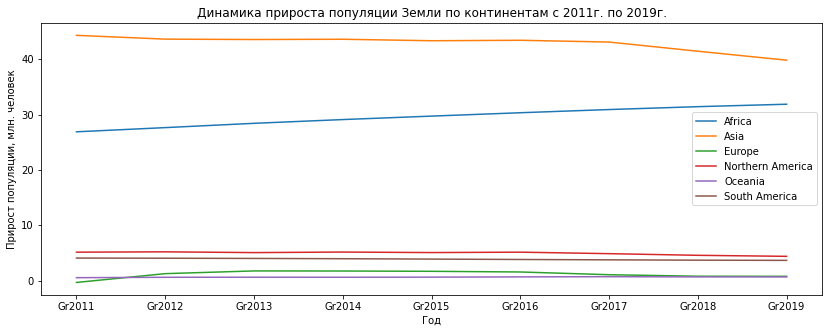

In [44]:
plot_dynamic_growth_continents = dynamic_growth_continents.iloc[0:-2, 0:-1]
for continent in plot_dynamic_growth_continents.columns:
    plt.plot(plot_dynamic_growth_continents.index, plot_dynamic_growth_continents[continent])
plt.title('Динамика прироста популяции Земли по континентам с 2011 по 2019 г.г.')
plt.xlabel('Год')
plt.ylabel('Прирост популяции, млн. человек') 
plt.legend(plot_dynamic_growth_continents)

<AxesSubplot:title={'center':'Динамика прироста популяции Земли по континентам с 2011 по 2019 г.г.'}, xlabel='Год', ylabel='Прирост популяции, млн. человек'>

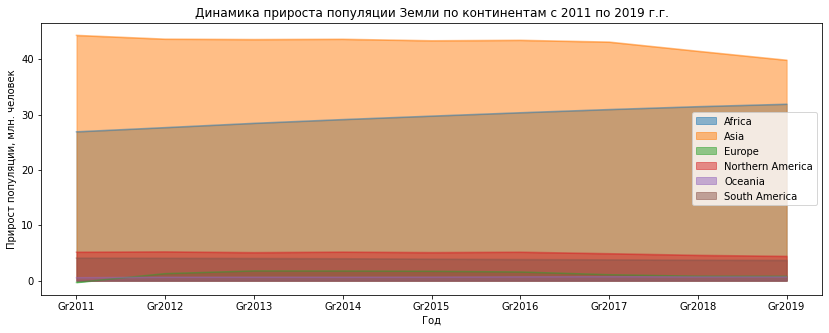

In [45]:
dynamic_growth_continents.iloc[:-2, :-1].plot(kind='area',
                             title='Динамика прироста популяции Земли по континентам с 2011 по 2019 г.г.', 
                             xlabel='Год', 
                             stacked=False,
                             ylabel='Прирост популяции, млн. человек')

<AxesSubplot:title={'center':'Динамика прироста популяции Земли по континентам с 2011 по 2019 г.г.'}, xlabel='Год', ylabel='Общий прирост популяции, млн. человек'>

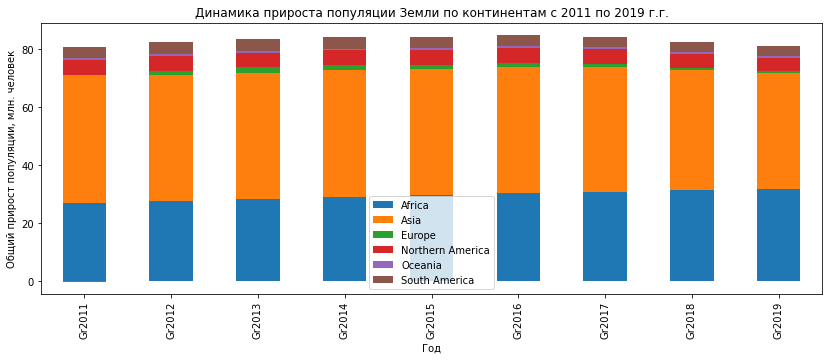

In [49]:
dynamic_growth_continents.iloc[:-2, :-1].plot(kind='bar', 
                                              title='Динамика прироста популяции Земли по континентам с 2011 по 2019 г.г.', 
                                              xlabel='Год',
                                              ylabel='Общий прирост популяции, млн. человек',
                                              stacked=True)

In [51]:
# Cтраны с естественной приростом населения выше среднеого значения (в рамках общей популяции, в абсолютном значении),
# за период 2010-2019 г.г.
growth.query('GrTotal > {}'.format(growth['GrTotal'].mean()))[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal']]\
      .sort_values('GrTotal', ascending=False)      

,Country,NativeName,Code,Continent,GrTotal
76,India,Republic of India,IND,Asia,132.137
27,People's Republic of China,中华人民共和国,CHN,Asia,60.010
180,Nigeria,Nijeriya,NGA,Africa,42.461
128,Pakistan,پاکستان,PAK,Asia,37.140
58,Indonesia,Republik Indonesia,IDN,Asia,28.792
23,Ethiopia,ኢትዮጵያ,ETH,Africa,24.439
158,Democratic Republic of the Congo,Republique Democratique du Congo,COD,Africa,22.227
6,United States of America,United States of America,USA,North America,18.918
20,Egypt,جُمهورِيّةُ مِصرَ العَرَبيّةِ,EGY,Africa,17.627
140,Bangladesh,গণপ্রজাতন্ত্রী বাংলাদেশ,BGD,Asia,15.471


## 4. Прирост популяций стран с 2010 по 2019 г.г

In [52]:
growth_countries = df4.drop('GrTotal', axis=1)
growth_countries['GrPrc2011'] = round(growth_countries['Gr2011'] / growth_countries['Pop2010'] * 100, 1)
growth_countries['GrPrc2012'] = round(growth_countries['Gr2012'] / growth_countries['Pop2011'] * 100, 1)
growth_countries['GrPrc2013'] = round(growth_countries['Gr2013'] / growth_countries['Pop2012'] * 100, 1)
growth_countries['GrPrc2014'] = round(growth_countries['Gr2014'] / growth_countries['Pop2013'] * 100, 1)
growth_countries['GrPrc2015'] = round(growth_countries['Gr2015'] / growth_countries['Pop2014'] * 100, 1)
growth_countries['GrPrc2016'] = round(growth_countries['Gr2016'] / growth_countries['Pop2015'] * 100, 1)
growth_countries['GrPrc2017'] = round(growth_countries['Gr2017'] / growth_countries['Pop2016'] * 100, 1)
growth_countries['GrPrc2018'] = round(growth_countries['Gr2018'] / growth_countries['Pop2017'] * 100, 1)
growth_countries['GrPrc2019'] = round(growth_countries['Gr2019'] / growth_countries['Pop2018'] * 100, 1)
growth_countries['GrPrcTotal'] = growth_countries.iloc[:, -9:].sum(axis=1)
growth_countries = growth_countries.drop(growth_countries.iloc[:, 4:24], axis=1)
growth_countries.head()

,Country,NativeName,Code,Continent,GrPrc2011,GrPrc2012,GrPrc2013,GrPrc2014,GrPrc2015,GrPrc2016,GrPrc2017,GrPrc2018,GrPrc2019,GrPrcTotal
0,Canada,Canada,CAN,North America,1.0,1.1,1.1,1.0,0.8,1.1,1.2,1.4,1.4,10.1
1,Japan,日本,JPN,Asia,-0.2,-0.2,-0.1,-0.1,-0.1,-0.1,-0.2,-0.2,-0.2,-1.4
2,Norway,Kongeriket Norge,NOR,Europe,1.3,1.3,1.2,1.1,1.0,0.9,0.8,0.7,0.7,9.0
3,Ireland,Eire,IRL,Europe,0.4,0.4,0.5,0.7,0.9,1.1,1.1,1.2,1.4,7.7
4,Hungary,Magyarorszag,HUN,Europe,-0.3,-0.5,-0.3,-0.3,-0.2,-0.3,-0.3,-0.1,-0.1,-2.4


In [53]:
# Страна с максимальным приростом популяции (в рамках страны) за период 2010-2019 г.г.
growth.sort_values('GrPerc', ascending=False).head(1)[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal,GrPerc
127,Oman,سلطنة عُمان,OMN,Asia,1.934,63.6


In [54]:
# Страна с минимальным приростом популяции (с максимальнай убылью населения,в рамках страны) за период 2010-2019 г.г.
growth.sort_values('GrPerc', ascending=True).head(1)[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal,GrPerc
132,Syria,الجمهورية العربية السورية,SYR,Asia,-4.293,-20.1


### Динамика прироста популяций стран по континентам с 2010 по 2019 г.г

In [55]:
dynamics_growth_countries_continents = growth_countries.groupby('Continent').sum().reset_index().T
dynamics_growth_countries_continents.rename(columns = { 
    dynamics_growth_countries_continents.columns[0]: 'Africa',
    dynamics_growth_countries_continents.columns[1]: 'Asia',
    dynamics_growth_countries_continents.columns[2]: 'Europe',
    dynamics_growth_countries_continents.columns[3]: 'Northern America',
    dynamics_growth_countries_continents.columns[4]: 'Oceania',
    dynamics_growth_countries_continents.columns[5]: 'South America'
}, inplace = True)
dynamics_growth_countries_continents = dynamics_growth_countries_continents.iloc[1:, 0:]
dynamics_growth_countries_continents['YearTotal'] = dynamics_growth_countries_continents.iloc[0:, 0:].sum(axis=1)
dynamics_growth_countries_continents

,Africa,Asia,Europe,Northern America,Oceania,South America,YearTotal
GrPrc2011,124.9,96.2,4.4,21.6,14.6,14.3,276.0
GrPrc2012,124.9,91.6,5.1,20.4,12.7,15.7,270.4
GrPrc2013,126,88,10.3,22.5,23.6,13.4,283.8
GrPrc2014,124,83.8,4.5,19.5,21.1,15.7,268.6
GrPrc2015,124.8,79.7,8.9,19.7,15.9,12.9,261.9
GrPrc2016,124.5,75.8,11.4,18.6,24.8,14.9,270.0
GrPrc2017,122.9,70.7,7.2,18.7,14.8,12.6,246.9
GrPrc2018,122.4,68.2,11.3,18,25.3,13.2,258.4
GrPrc2019,121.1,65.3,9.7,18.9,16.7,13.7,245.4
GrPrcTotal,1115.5,719.3,72.8,177.9,169.5,126.4,2381.4


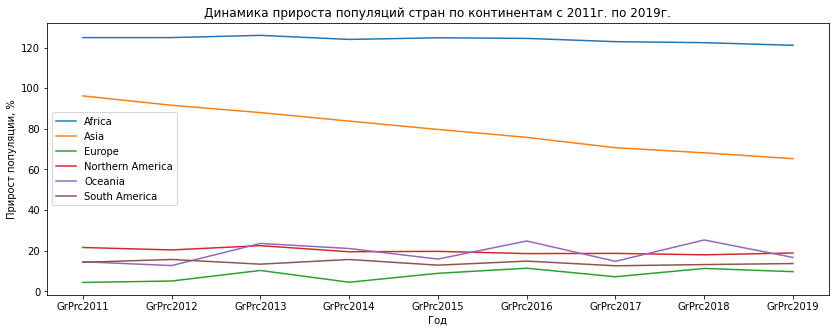

In [56]:
dynamics_growth_countries_continents_plot = dynamics_growth_countries_continents.iloc[0:-1, 0:-1]
for continent in dynamics_growth_countries_continents_plot.columns:
    plt.plot(dynamics_growth_countries_continents_plot.index, dynamics_growth_countries_continents_plot[continent])
plt.title('Динамика прироста популяций стран по континентам с 2011г. по 2019г.')
plt.xlabel('Год')
plt.ylabel('Прирост популяции, %') 
plt.legend(dynamics_growth_countries_continents_plot)

<AxesSubplot:title={'center':'Динамика '}, xlabel='Год', ylabel='Прирост популяции, %'>

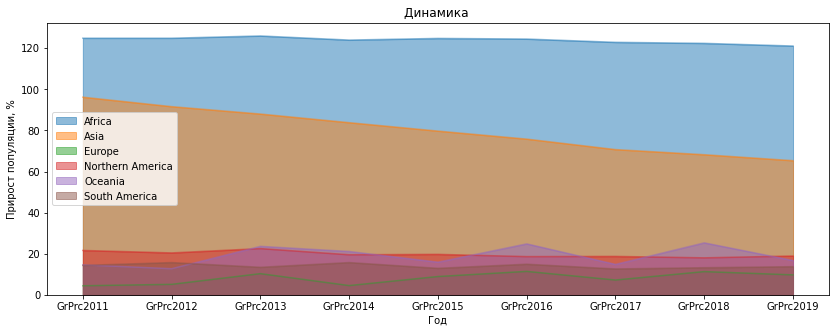

In [57]:
dynamics_growth_countries_continents.iloc[0:-1, 0:-1].plot(kind='area',
                             title='Динамика ', 
                             xlabel='Год', 
                             stacked=False,
                             ylabel='Прирост популяции, %')

<AxesSubplot:title={'center':'Динамика '}, xlabel='Год', ylabel='Прирост популяции, %'>

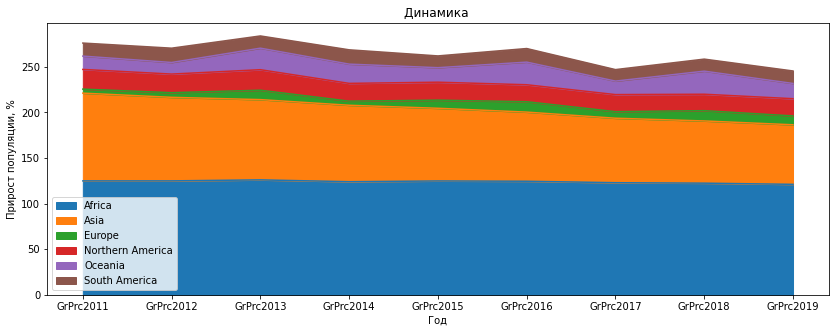

In [58]:
dynamics_growth_countries_continents.iloc[0:-1, 0:-1].plot(kind='area',
                             title='Динамика ', 
                             xlabel='Год', 
                             #stacked=False,
                             ylabel='Прирост популяции, %')

In [59]:
# Страны с максимальным приростом населения на континентах в 2019г. (млн. человек)
series_index_max_growths_countries_on_continents = growth.groupby('Continent').idxmax()['GrPerc']
countries_max_growths_on_continents = growth.loc[growth.index.isin(series_index_max_growths_countries_on_continents)]\
                                                      .sort_values(by='GrPerc', ascending=False)
countries_max_growths_on_continents = countries_max_growths_on_continents[['Country', 'NativeName', 'Code', 'Continent', 'GrPerc']]
countries_max_growths_on_continents

,Country,NativeName,Code,Continent,GrPerc
127,Oman,سلطنة عُمان,OMN,Asia,63.6
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,43.6
84,Nauru,Ripublik Naoero,NRU,Oceania,30.0
8,Luxembourg,Letzebuerg,LUX,Europe,22.3
56,Belize,Belize,BLZ,North America,21.1
94,Ecuador,Republica del Ecuador,ECU,South America,15.7


In [60]:
# Страны с минимальным приростом населения на континентах в 2019г. (млн. человек)
series_index_min_growths_countries_on_continents = growth.groupby('Continent').idxmin()['GrPerc']
countries_min_growths_on_continents = growth.loc[growth.index.isin(series_index_min_growths_countries_on_continents)]\
                                                      .sort_values(by='GrPerc', ascending=True)
countries_min_growths_on_continents = countries_min_growths_on_continents[['Country', 'NativeName', 'Code', 'Continent', 'GrPerc']]
countries_min_growths_on_continents

,Country,NativeName,Code,Continent,GrPerc
132,Syria,الجمهورية العربية السورية,SYR,Asia,-20.1
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,-10.9
78,Tonga,Tonga,TON,Oceania,0.0
90,Venezuela,Venezuela,VEN,South America,0.3
161,Eritrea,دولة إرتريا,ERI,Africa,0.9
55,Cuba,Republica de Cuba,CUB,North America,1.0


In [61]:
# Страны с максимальной динамикой прироста населения на континентах в 2019г. (млн. человек)
series_index_max_dynamycs_growths_countries_on_continents = growth_countries.groupby('Continent').idxmax()['GrPrcTotal']
countries_max_dynamycs_growths_on_continents = growth_countries.loc[growth_countries.index.isin(series_index_max_dynamycs_growths_countries_on_continents)]\
                                                      .sort_values(by='GrPrcTotal', ascending=False)
countries_max_dynamycs_growths_on_continents = countries_max_dynamycs_growths_on_continents[['Country', 'NativeName', 'Code', 'Continent', 'GrPrcTotal']]
countries_max_dynamycs_growths_on_continents

,Country,NativeName,Code,Continent,GrPrcTotal
127,Oman,سلطنة عُمان,OMN,Asia,50.8
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,37.1
84,Nauru,Ripublik Naoero,NRU,Oceania,27.4
8,Luxembourg,Letzebuerg,LUX,Europe,20.4
56,Belize,Belize,BLZ,North America,19.4
94,Ecuador,Republica del Ecuador,ECU,South America,14.8


In [62]:
# Страны с минимальной (отрицательной) динамикой прироста населения на континентах в 2019г. (млн. человек)
series_index_min_dynamycs_growths_countries_on_continents = growth_countries.groupby('Continent').idxmin()['GrPrcTotal']
countries_min_dynamycs_growths_on_continents = growth_countries.loc[growth_countries.index.isin(series_index_min_dynamycs_growths_countries_on_continents)]\
                                                      .sort_values(by='GrPrcTotal', ascending=True)
countries_min_dynamycs_growths_on_continents = countries_min_dynamycs_growths_on_continents[['Country', 'NativeName', 'Code', 'Continent', 'GrPrcTotal']]
countries_min_dynamycs_growths_on_continents

,Country,NativeName,Code,Continent,GrPrcTotal
132,Syria,الجمهورية العربية السورية,SYR,Asia,-21.8
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,-11.4
78,Tonga,Tonga,TON,Oceania,0.0
90,Venezuela,Venezuela,VEN,South America,0.3
161,Eritrea,دولة إرتريا,ERI,Africa,1.0
55,Cuba,Republica de Cuba,CUB,North America,1.0


<AxesSubplot:title={'center':'Growth Percent distribution'}, ylabel='Frequency'>

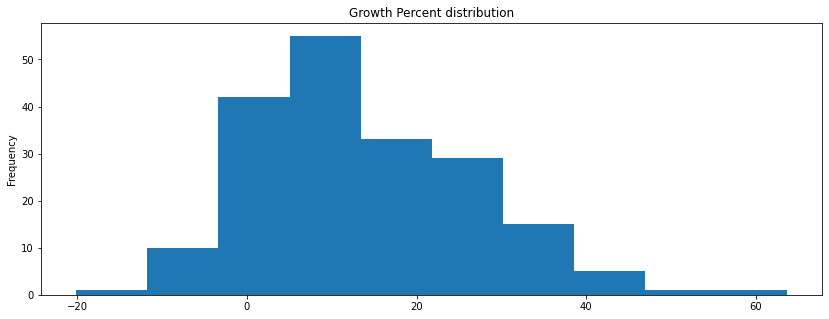

In [63]:
# Распределение показателей прироста стран
growth['GrPerc'].plot(kind='hist', 
                     title='Growth Percent distribution',
                     xlabel='GrPerc',
                     ylabel='Frequency')

<AxesSubplot:title={'center':'Growth Percent distribution'}>

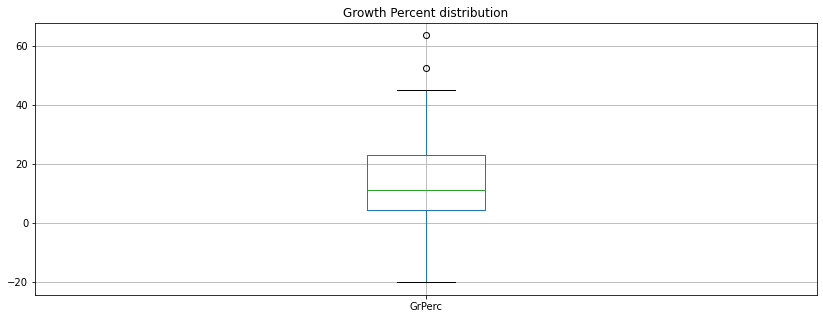

In [64]:
growth['GrPerc'].plot(kind='box',
                   title='Growth Percent distribution', grid=True)

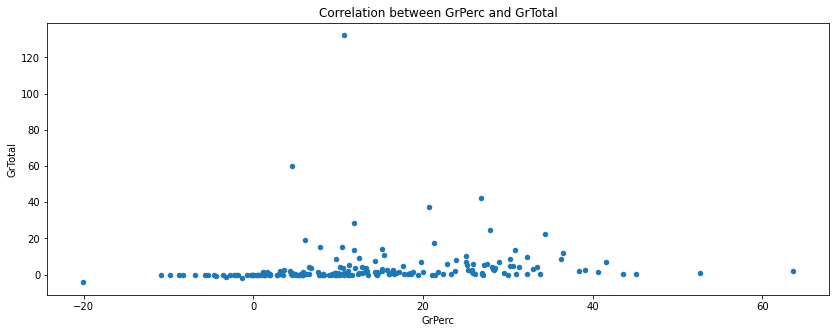

In [65]:
# Взаимосвязь показателей прироста в % (в рамках стран) и показателей прироста в млн. чел. (в рамках общей популяции)
growth.plot(kind='scatter', 
            x='GrPerc', 
            y='GrTotal', 
            title='Correlation between GrPerc and GrTotal')
plt.show()

<AxesSubplot:title={'center':'Correlation between Pop2019 and Growth'}, xlabel='GrPerc', ylabel='GrTotal'>

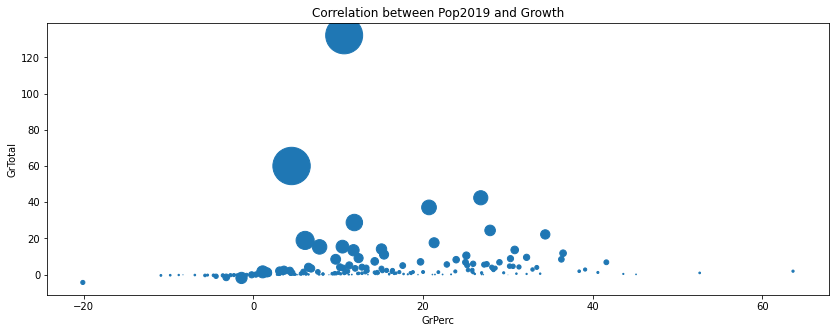

In [66]:
# Взаимосвязь показателей прироста в % (в рамках стран) и показателей прироста в млн. чел. (в рамках общей популяции)
# и общей популяции 
df4.plot(kind='scatter', 
            x='GrPerc', 
            y='GrTotal',
            s=df4['Pop2019'],# / 20,#*20,
            title='Correlation between Pop2019 and Growth')

In [67]:
# TOP-10 стран с наибольшим приростом населения (в рамках страны) за период 2010-2019 г.г.
growth.sort_values('GrPerc', ascending=False).head(10)[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal,GrPerc
127,Oman,سلطنة عُمان,OMN,Asia,1.934,63.6
129,Qatar,قطر,QAT,Asia,0.976,52.6
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,0.165,45.1
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,0.412,43.6
179,Niger,Nijar,NER,Africa,6.847,41.6
120,Kuwait,الكويت,KWT,Asia,1.215,40.6
117,Jordan,الأردن,JOR,Asia,2.840,39.1
122,Lebanon,الجمهورية اللبنانية,LBN,Asia,1.903,38.4
181,Uganda,Uganda,UGA,Africa,11.842,36.5
142,Angola,Republica de Angola,AGO,Africa,8.469,36.3


In [68]:
# TOP-10 стран с наименьшим приростом популяции (с максимальнай убылью населения, в рамках страны) за период 2010-2019 г.г.
growth.sort_values(by='GrPerc', ascending=True).head(10)[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal,GrPerc
132,Syria,الجمهورية العربية السورية,SYR,Asia,-4.293,-20.1
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,-0.404,-10.9
12,Lithuania,Lietuva,LTU,Europe,-0.303,-9.8
34,Latvia,Latvija,LVA,Europe,-0.184,-8.8
47,Andorra,Andorra,AND,Europe,-0.007,-8.3
39,Moldova,Republica Moldova,MDA,Europe,-0.198,-6.9
41,Bulgaria,България,BGR,Europe,-0.420,-5.7
44,Croatia,Republika Hrvatska,HRV,Europe,-0.230,-5.4
67,Serbia,Србија,SRB,Europe,-0.346,-4.7
40,Romania,Romania,ROU,Europe,-0.881,-4.4


In [69]:
# Cтраны с естественной убылью населения (в рамках страны), за период 2010-2019 г.г.
growth.loc[growth['GrPerc'] < 0].sort_values('GrPerc')[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]

,Country,NativeName,Code,Continent,GrTotal,GrPerc
132,Syria,الجمهورية العربية السورية,SYR,Asia,-4.293,-20.1
45,Bosnia and Herzegovina,Bosna i Hercegovina,BIH,Europe,-0.404,-10.9
12,Lithuania,Lietuva,LTU,Europe,-0.303,-9.8
34,Latvia,Latvija,LVA,Europe,-0.184,-8.8
47,Andorra,Andorra,AND,Europe,-0.007,-8.3
39,Moldova,Republica Moldova,MDA,Europe,-0.198,-6.9
41,Bulgaria,България,BGR,Europe,-0.420,-5.7
44,Croatia,Republika Hrvatska,HRV,Europe,-0.230,-5.4
67,Serbia,Србија,SRB,Europe,-0.346,-4.7
40,Romania,Romania,ROU,Europe,-0.881,-4.4


In [70]:
# Cтраны с естественной приростом населения выше среднеого значения (в рамках стран), за период 2010-2019 г.г.
growth.query('GrPerc > {}'.format(growth['GrPerc'].mean()))[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]\
      .sort_values('GrPerc', ascending=False)

,Country,NativeName,Code,Continent,GrTotal,GrPerc
127,Oman,سلطنة عُمان,OMN,Asia,1.934,63.6
129,Qatar,قطر,QAT,Asia,0.976,52.6
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,0.165,45.1
160,Equatorial Guinea,Republica de Guinea Ecuatorial,GNQ,Africa,0.412,43.6
179,Niger,Nijar,NER,Africa,6.847,41.6
...,...,...,...,...,...,...
87,Kiribati,Ribaberiki ni Kiribati,KIR,Oceania,0.015,14.6
96,Bolivia,Estado Plurinacional de Bolivia,BOL,South America,1.464,14.6
75,New Zealand,Aotearoa,NZL,Oceania,0.628,14.4
59,South Africa,Suid-Afrika,ZAF,Africa,7.341,14.3


Text(0.5, 1.0, 'Correlation between GrPerc and GrTotal')

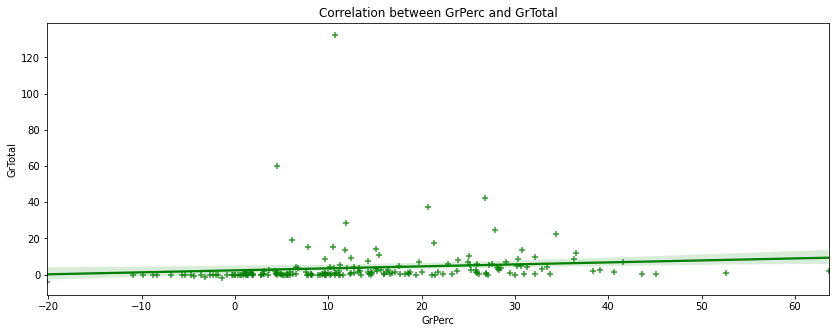

In [71]:
sns.regplot(data=growth, x='GrPerc', y='GrTotal', color='green', marker='+')
plt.title('Correlation between GrPerc and GrTotal')

## Отдельно выбранные страны

In [72]:
# Популяция Китая на 2019 г. и ее прирост за период 2010-2019 г.г.
population_china = population.loc[population.Country.str.contains('China')][['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
growth_china = growth.loc[growth.Country.str.contains('China')]
growth_china = growth_china[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]
display(population_china)
display(growth_china)

,Country,NativeName,Code,Continent,Pop2019
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715


,Country,NativeName,Code,Continent,GrTotal,GrPerc
27,People's Republic of China,中华人民共和国,CHN,Asia,60.01,4.5


In [73]:
# Популяция России на 2019 г. и ее прирост за период 2010-2019 г.г.
population_rus = population.loc[population.Country.str.contains('Russia')][['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
growth_russia = growth.loc[growth.Country.str.contains('Russia')]
growth_russia = growth_russia[['Country', 'NativeName', 'Code', 'Continent', 'GrTotal', 'GrPerc']]
display(population_rus)
display(growth_russia)

,Country,NativeName,Code,Continent,Pop2019
29,Russia,Россия,RUS,Europe,144.406


,Country,NativeName,Code,Continent,GrTotal,GrPerc
29,Russia,Россия,RUS,Europe,1.557,1.1


In [74]:
# Популяция США на 2019 г. и ее прирост за период 2010-2019 г.г.
population_usa = population.loc[population.Country.str.contains('United States')][['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
growth_usa = growth.loc[growth.Country.str.contains('United States')]
population_growth_usa = population_usa.join(growth_usa[['GrTotal', 'GrPerc']], how='left')
population_growth_usa

,Country,NativeName,Code,Continent,Pop2019,GrTotal,GrPerc
6,United States of America,United States of America,USA,North America,328.24,18.918,6.1


In [75]:
# Популяция Индии на 2019 г. и ее прирост за период 2010-2019 г.г. 
population_india = population.loc[population.Country.str.contains('India')][['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
growth_india = growth.loc[growth.Country.str.contains('India')]
population_growth_india = population_india.join(growth_india[['GrTotal', 'GrPerc']], how='left')
population_growth_india

,Country,NativeName,Code,Continent,Pop2019,GrTotal,GrPerc
76,India,Republic of India,IND,Asia,1366.418,132.137,10.7


# II. Countries Of The World

<p style="align: left;"><img align=left src="https://cs8.pikabu.ru/post_img/2016/01/20/8/1453293321190915084.png"  width=630></p>

https://www.kaggle.com/fernandol/countries-of-the-world/version/1  

Country - Страна  
Region - Регион  
Population - Популяция  
Area (sq. mi.) - Площадь (кв. мили)  
Pop. Density (per sq. mi.) - Плотность населения (на кв. милю)  
Coastline (coast / area ratio) - Береговая линия (отношение побережья к площади)  
Net migration - Чистая миграция  
Infant mortality (per 1000 births) - Младенческая смертность (на 1000 новорожденных)  
GDP (USD per capita) - ВВП (Дол. США на душу населения)  
Literacy (%) - Грамотность (%)  
Phones (per 1000) - Телефоны (на 1000 человек)  
Arable (%) - Пахотные (%)  
Crops (%) - Посевы (%)  
Other (%) - Другие (%)  
Climate - Климат  
Birthrate - Уровень рождаемости  
Deathrate - Уровень смертности  
Agriculture - Сельское хозяйство    
Industry - Промышленность    
Service - Услуги  

In [5]:
df5 = pd.read_csv('countries of the world.csv')

df5.Country = df5.Country.apply(lambda x: x.strip())
df5['Country'] = df5['Country'].apply(lambda x: 'Danish Realm' if x == "Denmark" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Kingdom of the Netherlands' if x == "Netherlands" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Eswatini' if x == "Swaziland" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Sao Tome and Principe' if x == "Sao Tome & Principe" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'The Gambia' if x == "Gambia, The" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Democratic Republic of the Congo' if x == "Congo, Dem. Rep." else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Republic of the Congo' if x == "Congo, Repub. of the" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Central African Republic' if x == "Central African Rep." else x)
df5['Country'] = df5['Country'].apply(lambda x: 'South Korea' if x == "Korea, South" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Antigua and Barbuda' if x == "Antigua & Barbuda" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'The Bahamas' if x == "Bahamas, The" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Saint Kitts and Nevis' if x == "Saint Kitts & Nevis" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Trinidad and Tobago' if x == "Trinidad & Tobago" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Federated States of Micronesia' if x == "Micronesia, Fed. St." else x)
df5['Country'] = df5['Country'].apply(lambda x: 'North Korea' if x == "Korea, North" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'Bosnia and Herzegovina' if x == "Bosnia & Herzegovina" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'North Macedonia' if x == "Macedonia" else x)
df5['Country'] = df5['Country'].apply(lambda x: "People's Republic of China" if x == "China" else x)
df5['Country'] = df5['Country'].apply(lambda x: 'United States of America' if x == "United States" else x)

df6 = df4.merge(df5, how='left', on='Country')

df6.drop(df6.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 26]], axis=1, inplace=True)

df6.rename(columns = {
    df6.columns[4]: 'Population',
    df6.columns[10]: 'Coastline',
    df6.columns[11]: 'NetMigration',
    df6.columns[12]: 'InfantMortality',
    df6.columns[13]: 'GDP',
    df6.columns[14]: 'Literacy',
    df6.columns[15]: 'Phones',
    df6.columns[16]: 'Arable',
    df6.columns[17]: 'Crops',
    df6.columns[18]: 'Other',
}, inplace = True)

df6.loc[df6.Country.isin(['Timor-Leste', 'Myanmar']), 'Region'] = 'ASIA (EX. NEAR EAST)         '
df6.loc[df6.Country == 'Montenegro' , 'Region'] = 'EASTERN EUROPE                     '
df6.loc[df6.Country == 'South Sudan' , 'Region'] = 'SUB-SAHARAN AFRICA                 '
df6.Region = df6.Region.apply(lambda x: x.strip().lower().title())

df6.loc[df6.Country == 'Montenegro' , 'Area (sq. mi.)'] = 5333.0
df6.loc[df6.Country == 'Timor-Leste' , 'Area (sq. mi.)'] = 5794.0
df6.loc[df6.Country == 'South Sudan' , 'Area (sq. mi.)'] = 248777.0
df6.loc[df6.Country == 'Myanmar' , 'Area (sq. mi.)'] = 261228.0
df6['Area'] = round(df6['Area (sq. mi.)'] * 2.58999) # 1 кв. миля = 2,58999 кв км

df6['PopDensity'] = round(df6['Population'] / df6['Area'] * 1000000)

df6.drop(df6.columns[[8, 9]], axis=1, inplace=True)

df6['Region'] = df6['Region'].apply(lambda x: 'Asia' if x == "Asia (Ex. Near East)" else x)

df6['NetMigration'] = df6['NetMigration'].str.replace(',', '.').astype(float)
df6['InfantMortality'] = df6['InfantMortality'].str.replace(',', '.').astype(float)
df6['Birthrate'] = df6['Birthrate'].str.replace(',', '.').astype(float)
df6['Deathrate'] = df6['Deathrate'].str.replace(',', '.').astype(float)
df6['Literacy'] = df6['Literacy'].str.replace(',', '.').astype(float)
df6['Coastline'] = df6['Coastline'].str.replace(',', '.').astype(float)
df6['Phones'] = df6['Phones'].str.replace(',', '.').astype(float)
df6['Climate'] = df6['Climate'].str.replace(',', '.').astype(float)
df6['Arable'] = df6['Arable'].str.replace(',', '.').astype(float)
df6['Crops'] = df6['Crops'].str.replace(',', '.').astype(float)
df6['Other'] = df6['Other'].str.replace(',', '.').astype(float)
df6['Agriculture'] = df6['Agriculture'].str.replace(',', '.').astype(float)
df6['Industry'] = df6['Industry'].str.replace(',', '.').astype(float)
df6['Service'] = df6['Service'].str.replace(',', '.').astype(float)

df6['Agriculture'] = round(df6['Agriculture'] * 100, 2)
df6['Industry'] = round(df6['Industry'] * 100, 2)
df6['Service'] = round(df6['Service'] * 100, 2)


countries_world = df6[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Population', 'Area', 'PopDensity', 'GrTotal',\
                       'GrPerc', 'NetMigration', 'InfantMortality', 'Birthrate', 'Deathrate', 'GDP', 'Literacy', 'Phones',\
                       'Coastline', 'Climate', 'Arable', 'Crops', 'Other', 'Agriculture', 'Industry', 'Service']]


countries_world.head()

,Country,NativeName,Code,Continent,Region,Population,Area,PopDensity,GrTotal,GrPerc,...,Literacy,Phones,Coastline,Climate,Arable,Crops,Other,Agriculture,Industry,Service
0,Canada,Canada,CAN,North America,Northern America,37.593,25860195.0,1.0,3.588,10.6,...,97.0,552.2,2.02,NaN,4.96,0.02,95.02,2.2,29.4,68.4
1,Japan,日本,JPN,Asia,Asia,126.265,978589.0,129.0,-1.805,-1.4,...,99.0,461.2,7.87,3.0,12.19,0.96,86.85,1.7,25.8,72.5
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,5.348,838644.0,6.0,0.459,9.4,...,100.0,461.7,7.77,3.0,2.87,0.00,97.13,2.1,41.5,56.4
3,Ireland,Eire,IRL,Europe,Western Europe,4.934,182024.0,27.0,0.374,8.2,...,98.0,500.5,2.06,3.0,15.20,0.03,84.77,5.0,46.0,49.0
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,9.771,240947.0,41.0,-0.229,-2.3,...,99.4,336.2,0.00,3.0,50.09,2.06,47.85,3.7,31.2,65.1


In [6]:
countries_world.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 192 entries, 0 to 191
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          192 non-null    object 
 1   NativeName       192 non-null    object 
 2   Code             192 non-null    object 
 3   Continent        192 non-null    object 
 4   Region           192 non-null    object 
 5   Population       192 non-null    float64
 6   Area             192 non-null    float64
 7   PopDensity       192 non-null    float64
 8   GrTotal          192 non-null    float64
 9   GrPerc           192 non-null    float64
 10  NetMigration     188 non-null    float64
 11  InfantMortality  188 non-null    float64
 12  Birthrate        187 non-null    float64
 13  Deathrate        187 non-null    float64
 14  GDP              188 non-null    float64
 15  Literacy         181 non-null    float64
 16  Phones           187 non-null    float64
 17  Coastline       

# 1. Площади территорий

In [5]:
# Общая площадь всех стран 
print(f"Общая площадь всех стран: {countries_world.Area.sum()} км. кв. или {round(countries_world.Area.sum() / 1000000, 1)} млн. км. кв.")

Общая площадь всех стран: 343475782.0 км. кв. или 343.5 млн. км. кв.


In [6]:
# Площади континентов (млн. кв. км.)
area_continents = countries_world.groupby('Continent').sum()['Area'].reset_index().sort_values('Area', ascending = False)
area_continents.Area = round(area_continents.Area / 1000000, 1)
area_continents.columns = ['Continent', 'Area_BlnSqrKm']
area_continents

,Continent,Area_BlnSqrKm
1,Asia,80.7
0,Africa,77.6
2,Europe,59.5
3,North America,57.8
5,South America,45.9
4,Oceania,22.0


<AxesSubplot:title={'center':'Распределение площадей континентов'}, ylabel='Area'>

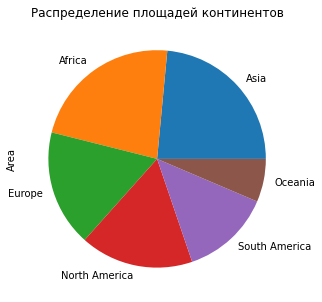

In [7]:
# Распределение площадей континентов
pie_area_continents = pd.DataFrame(countries_world.groupby('Continent').Area.sum()).sort_values('Area', ascending = False)
pie_area_continents.plot.pie(y='Area', figsize=(5, 5), title='Распределение площадей континентов', legend=False)

Text(0.5, 1.0, 'Distribution of area by continents (Распределение площадей континентов)')

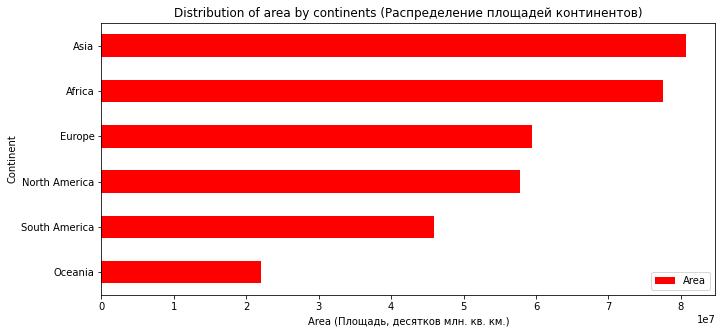

In [8]:
barh_area_continents = countries_world[['Continent', 'Area']].groupby('Continent').sum().sort_values('Area', ascending=True)
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
barh_area_continents.plot(kind='barh', ax=ax, color='red')
ax.set_xlabel('Area (Площадь, десятков млн. кв. км.)') #млн. человек)')
ax.set_title('Distribution of area by continents (Распределение площадей континентов)')

In [9]:
# Страна с максимальной площадью (млн. кв. км.)
area_max = countries_world.query('Area == {}'.format(countries_world['Area'].max()))\
           [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
area_max.Area = round(area_max.Area / 1000000, 1)
area_max

,Country,NativeName,Code,Continent,Region,Area
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,44.2


In [10]:
# Страна с минимальной площадью (млн. кв. км.)
area_min = countries_world.query('Area == {}'.format(countries_world['Area'].min()))\
           [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
area_min.Area = area_min.Area / 1000000
area_min

,Country,NativeName,Code,Continent,Region,Area
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.000005


In [11]:
# Страны с максимальными площадями на континентах (млн. кв. км.)
series_index_max_area_continents = countries_world.groupby('Continent').idxmax()['Area']
countries_max_area_continents = countries_world.loc[df6.index.isin(series_index_max_area_continents)]\
                                               .sort_values(by='Area', ascending=False)
countries_max_area_continents = countries_max_area_continents[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
countries_max_area_continents.Area = round(countries_max_area_continents.Area / 1000000, 1)
countries_max_area_continents

,Country,NativeName,Code,Continent,Region,Area
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,44.2
0,Canada,Canada,CAN,North America,Northern America,25.9
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,24.9
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,22.0
68,Australia,Australia,AUS,Oceania,Oceania,19.9
188,Sudan,جمهورية السودان,SDN,Africa,Sub-Saharan Africa,6.5


In [12]:
# Страны с минимальными площадями на континентах (млн. кв. км.)
series_index_min_area_continents = countries_world.groupby('Continent').idxmin()['Area']
countries_min_area_continents = countries_world.loc[df6.index.isin(series_index_min_area_continents)]\
                                               .sort_values(by='Area', ascending=True)
countries_min_area_continents = countries_min_area_continents[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
countries_min_area_continents.Area = round(countries_min_area_continents.Area / 1000000, 6)
countries_min_area_continents

,Country,NativeName,Code,Continent,Region,Area
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.000005
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.000054
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,Latin Amer. & Carib,0.000676
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,Asia,0.000777
102,Grenada,Grenada,GRD,North America,Latin Amer. & Carib,0.000891
185,Seychelles,Republique des Seychelles,SYC,Africa,Sub-Saharan Africa,0.001178


In [13]:
# TOP-10 стран с наибольшими территориями (млн. кв. км.)
top10_max_area = countries_world.sort_values(by='Area', ascending=False).head(10)\
                 [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
top10_max_area.Area = round(top10_max_area.Area / 1000000, 1)
top10_max_area

,Country,NativeName,Code,Continent,Region,Area
29,Russia,Россия,RUS,Europe,C.W. Of Ind. States,44.2
0,Canada,Canada,CAN,North America,Northern America,25.9
6,United States of America,United States of America,USA,North America,Northern America,24.9
27,People's Republic of China,中华人民共和国,CHN,Asia,Asia,24.9
28,Brazil,Republica Federativa do Brasil,BRA,South America,Latin Amer. & Carib,22.0
68,Australia,Australia,AUS,Oceania,Oceania,19.9
76,India,Republic of India,IND,Asia,Asia,8.5
69,Argentina,Argentina,ARG,South America,Latin Amer. & Carib,7.2
50,Kazakhstan,Қазақстан Республикасы,KAZ,Asia,C.W. Of Ind. States,7.0
188,Sudan,جمهورية السودان,SDN,Africa,Sub-Saharan Africa,6.5


In [14]:
# TOP-10 стран с наименьшими территориями (млн. кв. км.)
top10_min_area = countries_world.sort_values(by='Area', ascending=True).head(10)\
                 [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Area']]
top10_min_area.Area = round(top10_min_area.Area / 1000000, 6)
top10_min_area

,Country,NativeName,Code,Continent,Region,Area
52,Monaco,Principaute de Monaco,MCO,Europe,Western Europe,0.000005
84,Nauru,Ripublik Naoero,NRU,Oceania,Oceania,0.000054
77,Tuvalu,Tuvalu,TUV,Oceania,Oceania,0.000067
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,Western Europe,0.000158
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,0.000414
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,Latin Amer. & Carib,0.000676
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,Asia,0.000777
51,Malta,Malta,MLT,Europe,Western Europe,0.000818
102,Grenada,Grenada,GRD,North America,Latin Amer. & Carib,0.000891
98,Saint Vincent and the Grenadines,Saint Vincent and the Grenadines,VCT,North America,Latin Amer. & Carib,0.001008


# 2. Плотность населения

In [15]:
# Плотность населения Земли 
print('Плотность населения Земли:', round(countries_world.Population.sum() * 1000000 / countries_world.Area.sum()), 'чел. на км. кв.')

Плотность населения Земли: 22 чел. на км. кв.


In [16]:
# Плотности населения континентов (чел. на кв. км.)
population_density_continents = countries_world.groupby('Continent').agg({'Population': 'sum', 'Area': 'sum'}).reset_index()
population_density_continents.Area = population_density_continents.Area / 1000000
population_density_continents['PopDensity'] = round(population_density_continents['Population'] / population_density_continents['Area'])
population_density_continents.index = population_density_continents.Continent
population_density_continents.drop(population_density_continents.columns[[0]], axis=1, inplace=True)
population_density_continents = population_density_continents.sort_values(by='PopDensity', ascending=False)
population_density_continents

,Population,Area,PopDensity
Continent,,,
Asia,4529.576,80.711840,56.0
Africa,1291.376,77.568100,17.0
Europe,744.367,59.469325,13.0
North America,580.911,57.803658,10.0
South America,427.578,45.921273,9.0
Oceania,41.616,22.001586,2.0


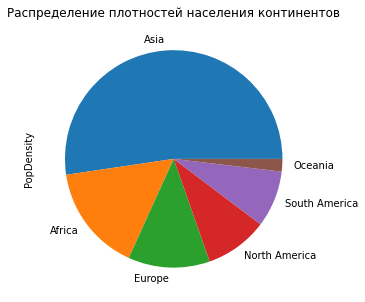

In [17]:
pie_population_density_continents = population_density_continents.plot.pie(y='PopDensity', figsize=(5, 5),\
                                    title='Распределение плотностей населения континентов', legend=False)

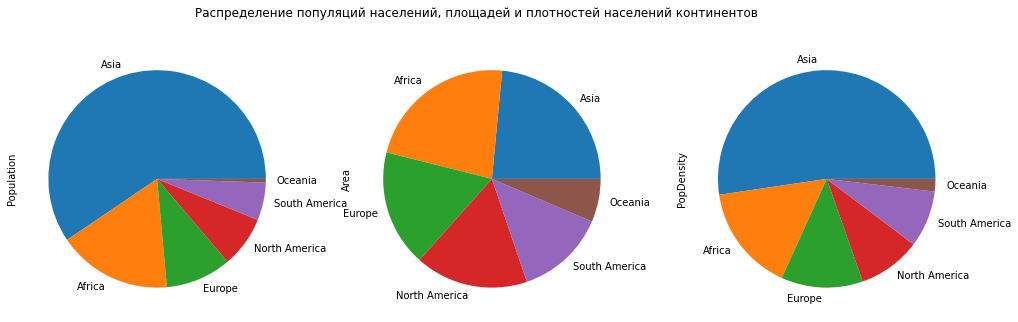

In [18]:
pies_population_area_population_density_continents = population_density_continents.plot.pie(subplots=True, figsize=(17, 5),\
                                    title='Распределение популяций населений, площадей и плотностей населений континентов',\
                                    legend=False)

Text(0.5, 1.0, 'Distribution of population density by continents (Распределение плотностей населения по континентам)')

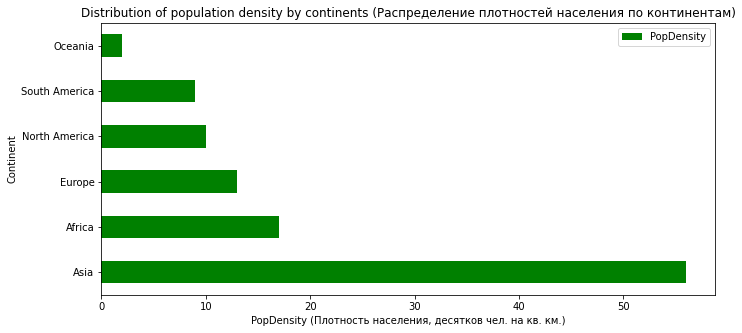

In [19]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
barh_population_density_continents = population_density_continents['PopDensity'].plot(kind='barh', ax=ax, color='green', legend=True)
ax.set_xlabel('PopDensity (Плотность населения, десятков чел. на кв. км.)')
ax.set_title('Distribution of population density by continents (Распределение плотностей населения по континентам)')

Text(0.5, 1.0, 'Распределение площадей территорий и плотностей населений континентов')

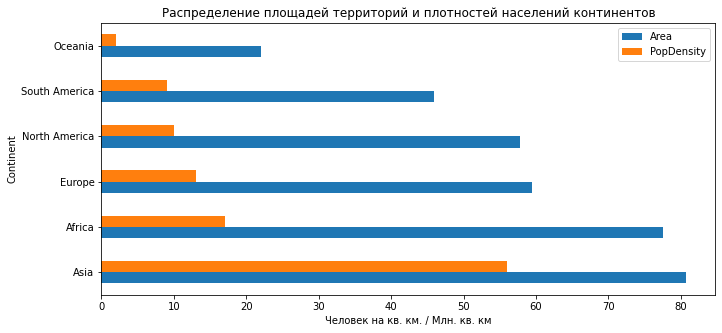

In [20]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(211)
barh_population_density_continents = population_density_continents[['Area', 'PopDensity']].plot(kind='barh', ax=ax, legend=True)
ax.set_xlabel('Человек на кв. км. / Млн. кв. км')
ax.set_title('Распределение площадей территорий и плотностей населений континентов')

In [21]:
europe = countries_world.loc[countries_world.Continent.str.contains('Europe')]
africa = countries_world.loc[countries_world.Continent.str.contains('Africa')]
asia = countries_world.loc[countries_world.Continent.str.contains('Asia')]
north_america = countries_world.loc[countries_world.Continent.str.contains('North America')]
south_america = countries_world.loc[countries_world.Continent.str.contains('South America')]
oceania = countries_world.loc[countries_world.Continent.str.contains('Oceania')]

In [22]:
areas_three_continents = area_continents.loc[area_continents.Continent.isin(['Europe','Africa', 'Asia'])]
areas_three_continents

,Continent,Area_BlnSqrKm
1,Asia,80.7
0,Africa,77.6
2,Europe,59.5


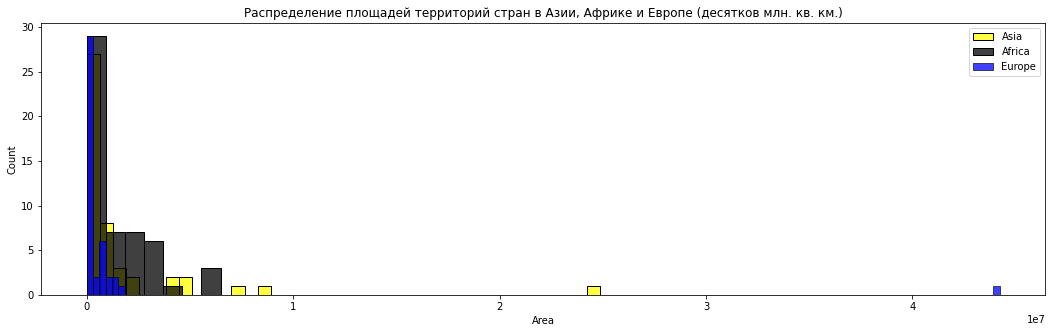

In [23]:
#fig = plt.figure(figsize=(15, 12))
sns.histplot(asia, x='Area', color='yellow')
sns.histplot(africa, x='Area', color='black')
sns.histplot(europe, x='Area', color='blue')
plt.title('Распределение площадей территорий стран в Азии, Африке и Европе (десятков млн. кв. км.)')
plt.legend(areas_three_continents.Continent.unique())

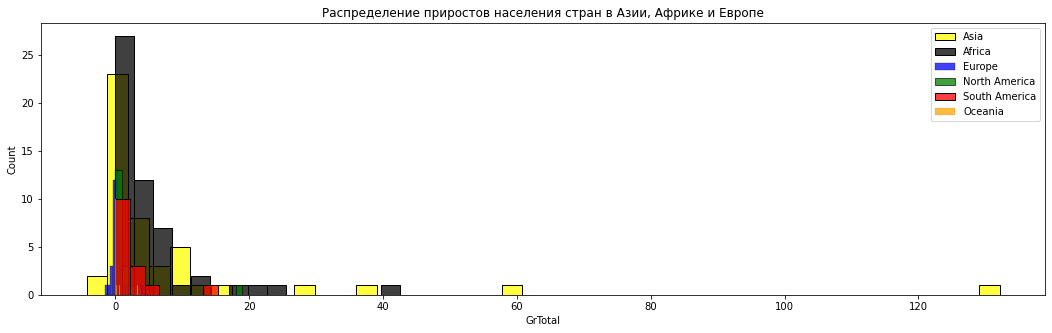

In [24]:
sns.histplot(asia, x='GrTotal', color='yellow')
sns.histplot(africa, x='GrTotal', color='black')
sns.histplot(europe, x='GrTotal', color='blue')
sns.histplot(north_america, x='GrTotal', color='green')
sns.histplot(south_america, x='GrTotal', color='red')
sns.histplot(oceania, x='GrTotal', color='orange')
plt.title('Распределение приростов населения стран в Азии, Африке и Европе')
plt.legend(area_continents.Continent.unique())
#plt.legend(countries_world.Continent.unique())

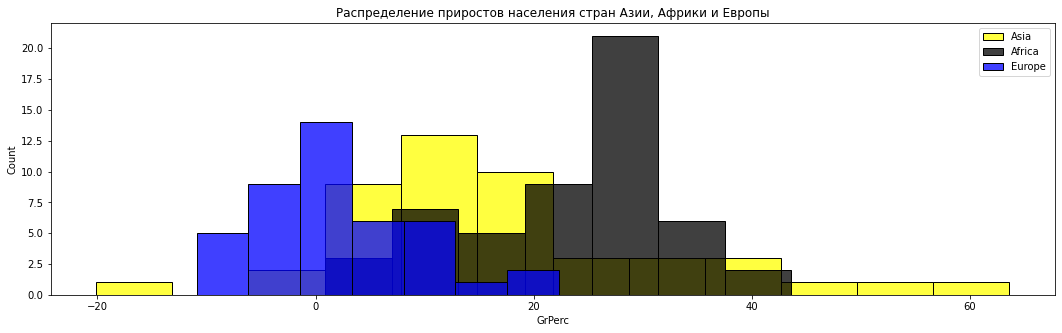

In [25]:
sns.histplot(asia, x='GrPerc', color='yellow')
sns.histplot(africa, x='GrPerc', color='black')
sns.histplot(europe, x='GrPerc', color='blue')
#sns.histplot(north_america, x='GrPerc', color='green')
#sns.histplot(south_america, x='GrPerc', color='orange')
#sns.histplot(oceania, x='GrPerc', color='brown')
plt.title('Распределение приростов населения стран Азии, Африки и Европы')
plt.legend(area_continents.Continent.unique())

## ВВП

In [5]:
# Страна с максимальным ВВП (долларов США на душу населения)
gdp_max = countries_world.query('GDP == {}'.format(countries_world['GDP'].max()))\
          [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
gdp_max

,Country,NativeName,Code,Continent,Region,GDP
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,55100.0


In [6]:
# Страна с минимальным ВВП (долларов США на душу населения)
gdp_min = countries_world.query('GDP == {}'.format(countries_world['GDP'].min()))\
          [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
gdp_min

,Country,NativeName,Code,Continent,Region,GDP
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,500.0
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,Sub-Saharan Africa,500.0


In [7]:
# Страны с максимальным ВВП по континентам (долларов США на душу населения)
series_index_max_gdp_continents = countries_world.groupby('Continent').idxmax()['GDP']
countries_max_gdp_continents = countries_world.loc[countries_world.index.isin(series_index_max_gdp_continents)]\
                                                      .sort_values(by='GDP', ascending=False)
countries_max_gdp_continents = countries_max_gdp_continents[['Country', 'NativeName', 'Code', 'Continent', 'GDP']]
countries_max_gdp_continents

,Country,NativeName,Code,Continent,GDP
8,Luxembourg,Letzebuerg,LUX,Europe,55100.0
6,United States of America,United States of America,USA,North America,37800.0
68,Australia,Australia,AUS,Oceania,29000.0
1,Japan,日本,JPN,Asia,28200.0
104,The Bahamas,Commonwealth of the Bahamas,BHS,South America,16700.0
175,Mauritius,Republique de Maurice,MUS,Africa,11400.0


In [8]:
# Страны с минимальным ВВП по континентам (долларов США на душу населения)
series_index_min_gdp_continents = countries_world.groupby('Continent').idxmin()['GDP']
countries_min_gdp_continents = countries_world.loc[countries_world.index.isin(series_index_min_gdp_continents)]\
                                                      .sort_values(by='GDP', ascending=True)
countries_min_gdp_continents = countries_min_gdp_continents[['Country', 'NativeName', 'Code', 'Continent', 'GDP']]
countries_min_gdp_continents

,Country,NativeName,Code,Continent,GDP
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,500.0
139,Afghanistan,افغانستان,AFG,Asia,700.0
87,Kiribati,Ribaberiki ni Kiribati,KIR,Oceania,800.0
109,Haiti,Ayiti,HTI,North America,1600.0
39,Moldova,Republica Moldova,MDA,Europe,1800.0
96,Bolivia,Estado Plurinacional de Bolivia,BOL,South America,2400.0


In [9]:
# TOP-10 стран с наибольшим ВВП
top10_max_gdp = countries_world.sort_values(by='GDP', ascending=False).head(10)\
                [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
top10_max_gdp

,Country,NativeName,Code,Continent,Region,GDP
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,55100.0
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,37800.0
6,United States of America,United States of America,USA,North America,Northern America,37800.0
54,San Marino,Serenissima Repubblica di San Marino,SMR,Europe,Western Europe,34600.0
14,Switzerland,Schweizerische Eidgenossenschaft,CHE,Europe,Western Europe,32700.0
191,Danish Realm,Kongeriget Danmark,DNK,Europe,Western Europe,31100.0
32,Iceland,Island,ISL,Europe,Western Europe,30900.0
15,Austria,Republik Osterreich,AUT,Europe,Western Europe,30000.0
0,Canada,Canada,CAN,North America,Northern America,29800.0
3,Ireland,Eire,IRL,Europe,Western Europe,29600.0


In [10]:
# TOP-10 стран с наименьшим ВВП
top10_min_gdp = countries_world.sort_values(by='GDP', ascending=True).head(10)\
                [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'GDP']]
top10_min_gdp

,Country,NativeName,Code,Continent,Region,GDP
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,500.0
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,Sub-Saharan Africa,500.0
155,Burundi,Uburundi,BDI,Africa,Sub-Saharan Africa,600.0
145,Tanzania,Jamhuri ya Muungano wa Tanzania,TZA,Africa,Sub-Saharan Africa,600.0
173,Malawi,Republic of Malawi,MWI,Africa,Sub-Saharan Africa,600.0
139,Afghanistan,افغانستان,AFG,Asia,Asia,700.0
23,Ethiopia,ኢትዮጵያ,ETH,Africa,Sub-Saharan Africa,700.0
158,Democratic Republic of the Congo,Republique Democratique du Congo,COD,Africa,Sub-Saharan Africa,700.0
161,Eritrea,دولة إرتريا,ERI,Africa,Sub-Saharan Africa,700.0
156,Comoros,Union des Comores,COM,Africa,Sub-Saharan Africa,700.0


### Образованность населения Земли

In [11]:
# Страны с максимальным уровнем образованности населения
literacy_max = countries_world.query('Literacy == {}'.format(countries_world['Literacy'].max()))\
               [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
literacy_max

,Country,NativeName,Code,Continent,Region,Literacy
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,100.0
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,100.0
9,Finland,Suomi,FIN,Europe,Western Europe,100.0
47,Andorra,Andorra,AND,Europe,Western Europe,100.0
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,100.0
68,Australia,Australia,AUS,Oceania,Oceania,100.0
191,Danish Realm,Kongeriget Danmark,DNK,Europe,Western Europe,100.0


In [12]:
# Страна с минимальным уровнем образованности населения
literacy_min = countries_world.query('Literacy == {}'.format(countries_world['Literacy'].min()))\
               [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
literacy_min

,Country,NativeName,Code,Continent,Region,Literacy
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,17.6


In [13]:
# Страны с максимальным уровнем образованности населения по континентам
series_index_max_literacy_continents = countries_world.groupby('Continent').idxmax()['Literacy']
countries_max_literacy_continents = countries_world.loc[countries_world.index.isin(series_index_max_literacy_continents)]\
                                                      .sort_values(by='Literacy', ascending=False)
countries_max_literacy_continents = countries_max_literacy_continents[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
countries_max_literacy_continents

,Country,NativeName,Code,Continent,Region,Literacy
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,100.0
68,Australia,Australia,AUS,Oceania,Oceania,100.0
133,Tajikistan,Ҷумҳурии Тоҷикистон,TJK,Asia,C.W. Of Ind. States,99.4
93,Guyana,Co-operative Republic of Guyana,GUY,South America,Latin Amer. & Carib,98.8
97,Trinidad and Tobago,Trinidad and Tobago,TTO,North America,Latin Amer. & Carib,98.6
59,South Africa,Suid-Afrika,ZAF,Africa,Sub-Saharan Africa,86.4


In [14]:
# C дополнением еще нескольких стран с максимальным уровнем образованности населения:
europe_literacy_max = literacy_max.loc[(literacy_max.Continent == ('Europe')) & (literacy_max.Country != ('Norway'))]
pd.concat([europe_literacy_max, countries_max_literacy_continents], axis=0)

,Country,NativeName,Code,Continent,Region,Literacy
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,100.0
9,Finland,Suomi,FIN,Europe,Western Europe,100.0
47,Andorra,Andorra,AND,Europe,Western Europe,100.0
64,Liechtenstein,Liechtenstein,LIE,Europe,Western Europe,100.0
191,Danish Realm,Kongeriget Danmark,DNK,Europe,Western Europe,100.0
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,100.0
68,Australia,Australia,AUS,Oceania,Oceania,100.0
133,Tajikistan,Ҷумҳурии Тоҷикистон,TJK,Asia,C.W. Of Ind. States,99.4
93,Guyana,Co-operative Republic of Guyana,GUY,South America,Latin Amer. & Carib,98.8
97,Trinidad and Tobago,Trinidad and Tobago,TTO,North America,Latin Amer. & Carib,98.6


In [15]:
# Страны с минимальным уровнем образованности населения по континентам
series_index_min_literacy_continents = countries_world.groupby('Continent').idxmin()['Literacy']
countries_min_literacy_continents = countries_world.loc[countries_world.index.isin(series_index_min_literacy_continents)]\
                                                      .sort_values(by='Literacy', ascending=False)
countries_min_literacy_continents = countries_min_literacy_continents[['Country', 'NativeName', 'Code', 'Continent', 'Literacy']]
countries_min_literacy_continents

,Country,NativeName,Code,Continent,Literacy
43,Albania,Republika e Shqiperise,ALB,Europe,86.5
28,Brazil,Republica Federativa do Brasil,BRA,South America,86.4
81,Vanuatu,Ripablik blong Vanuatu,VUT,Oceania,53.0
109,Haiti,Ayiti,HTI,North America,52.9
139,Afghanistan,افغانستان,AFG,Asia,36.0
179,Niger,Nijar,NER,Africa,17.6


In [16]:
# TOP-10 стран с наименьшим уровнем образованности
top10_min_literacy = countries_world.sort_values(by='Literacy', ascending=True).head(10)\
                     [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']]
top10_min_literacy

,Country,NativeName,Code,Continent,Region,Literacy
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,17.6
154,Burkina Faso,Burkina Faso,BFA,Africa,Sub-Saharan Africa,26.6
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,31.4
164,Guinea,Republique de Guinee,GIN,Africa,Sub-Saharan Africa,35.9
139,Afghanistan,افغانستان,AFG,Asia,Asia,36.0
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,Sub-Saharan Africa,37.8
163,The Gambia,Republic of The Gambia,GMB,Africa,Sub-Saharan Africa,40.1
184,Senegal,Senegaal,SEN,Africa,Sub-Saharan Africa,40.2
112,Iraq,العراق,IRQ,Asia,Near East,40.4
152,Benin,Benin,BEN,Africa,Sub-Saharan Africa,40.9


In [17]:
# Средний уровень образованности по миру
average_literacy = round(countries_world['Literacy'].mean(), 1)
print(f"Среднее значение уровня образованности по миру: {average_literacy}")

Среднее значение уровня образованности по миру: 81.4


In [18]:
# Страны с уровнем образованности меньше среднего по миру
less_average = countries_world.query('Literacy < {}'.format(countries_world['Literacy'].mean()))\
               [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy']].sort_values('Literacy', ascending=True)
less_average

,Country,NativeName,Code,Continent,Region,Literacy
179,Niger,Nijar,NER,Africa,Sub-Saharan Africa,17.6
154,Burkina Faso,Burkina Faso,BFA,Africa,Sub-Saharan Africa,26.6
186,Sierra Leone,Republic of Sierra Leone,SLE,Africa,Sub-Saharan Africa,31.4
164,Guinea,Republique de Guinee,GIN,Africa,Sub-Saharan Africa,35.9
139,Afghanistan,افغانستان,AFG,Asia,Asia,36.0
...,...,...,...,...,...,...
183,Sao Tome and Principe,Republica Democratica de Sao Tome e Principe,STP,Africa,Sub-Saharan Africa,79.3
111,Iran,ایران,IRN,Asia,Asia,79.4
153,Botswana,Botswana,BWA,Africa,Sub-Saharan Africa,79.8
110,El Salvador,El Salvador,SLV,North America,Latin Amer. & Carib,80.2


In [19]:
# Распределение стран с уровнем образованности меньше среднего по континентам
count_less_average_continent = less_average.groupby('Continent').count().reset_index()[['Continent', 'Country']]
count_less_average_continent

,Continent,Country
0,Africa,43
1,Asia,15
2,North America,6
3,Oceania,2


In [20]:
# Страны в Северной Америке с уровнем образованности меньше среднего
less_average.loc[(less_average.Continent == ('North America')) & (less_average.Literacy < average_literacy)]

,Country,NativeName,Code,Continent,Region,Literacy
109,Haiti,Ayiti,HTI,North America,Latin Amer. & Carib,52.9
99,Saint Lucia,Saint Lucia,LCA,North America,Latin Amer. & Carib,67.0
118,Nicaragua,Republica de Nicaragua,NIC,North America,Latin Amer. & Carib,67.5
103,Guatemala,Guatemala,GTM,North America,Latin Amer. & Carib,70.6
106,Honduras,Republica de Honduras,HND,North America,Latin Amer. & Carib,76.2
110,El Salvador,El Salvador,SLV,North America,Latin Amer. & Carib,80.2


In [21]:
# Количество и доля населения в мире с уровнем образованности ниже среднего
count_population_less_average = countries_world.query('Literacy < {}'.format(countries_world['Literacy'].mean()))\
                                [['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Literacy', 'Population']]\
                                .sort_values('Literacy', ascending=True)

print(f"Количество людей с уровнем образованности ниже среднего: {round(count_population_less_average.Population.sum(), 1)} млн. чел.")
print(f"Доля населения Земли с уровнем образованности ниже среднего: {round(count_population_less_average.Population.sum() / countries_world.Population.sum() * 100)} %")

Количество людей с уровнем образованности ниже среднего: 3263.1 млн. чел.
Доля населения Земли с уровнем образованности ниже среднего: 43 %


In [22]:
countries_average_literacy = countries_world[['Country', 'Continent', 'Literacy', 'Population']]
countries_average_literacy['LevelLiteracy'] = countries_average_literacy['Literacy'].apply(lambda x: 'Less average' if x < average_literacy else 'More then average')
countries_average_literacy.head()

<ipython-input-22-2581edadc663>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries_average_literacy['LevelLiteracy'] = countries_average_literacy['Literacy'].apply(lambda x: 'Less average' if x < average_literacy else 'More then average')


,Country,Continent,Literacy,Population,LevelLiteracy
0,Canada,North America,97.0,37.593,More then average
1,Japan,Asia,99.0,126.265,More then average
2,Norway,Europe,100.0,5.348,More then average
3,Ireland,Europe,98.0,4.934,More then average
4,Hungary,Europe,99.4,9.771,More then average


,Population,Country,PopulationPerc,CountryPerc
LevelLiteracy,,,,
Less average,3263.076,66,42.8,34.4
More then average,4352.348,126,57.2,65.6


array([<AxesSubplot:ylabel='PopulationPerc'>,
       <AxesSubplot:ylabel='CountryPerc'>], dtype=object)

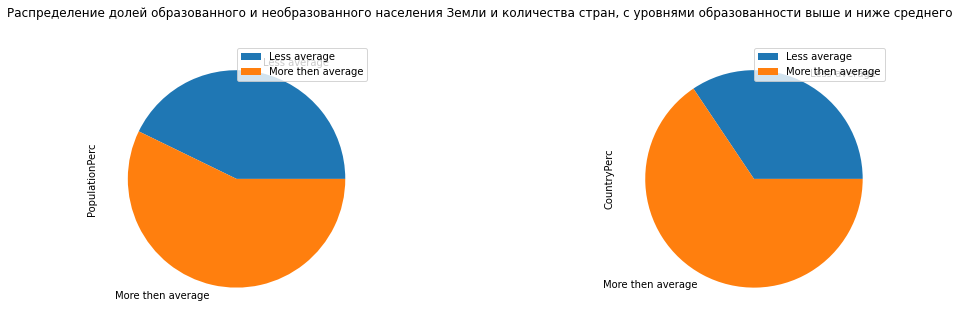

In [23]:
groupby_literacy = countries_average_literacy.groupby('LevelLiteracy').agg({'Population': 'sum', 'Country': 'count'}).reset_index()
groupby_literacy['PopulationPerc'] = round(groupby_literacy.Population / groupby_literacy.Population.sum() * 100, 1)
groupby_literacy['CountryPerc'] = round(groupby_literacy.Country / groupby_literacy.Country.sum() * 100, 1)
groupby_literacy.index = groupby_literacy.LevelLiteracy
groupby_literacy.drop(groupby_literacy.columns[[0]], axis=1, inplace=True)
display(groupby_literacy)
groupby_literacy[['PopulationPerc', 'CountryPerc']].plot.pie(subplots=True, figsize=(17, 5),\
    title='Распределение долей образованного и необразованного населения Земли и количества стран, с уровнями образованности выше и ниже среднего',\
    legend=True)

,Literacy
count,181.000000
mean,81.438122
std,20.375853
min,17.600000
25%,68.900000
50%,90.900000
75%,98.000000
max,100.000000


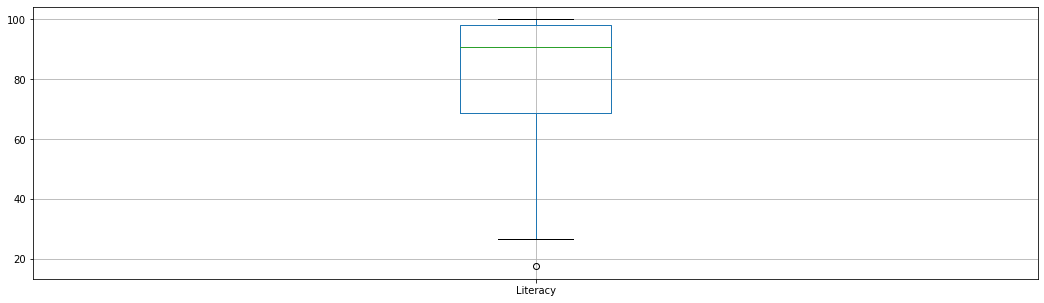

In [5]:
literacy_by_continent = countries_world[['Continent', 'Literacy']]
display(pd.DataFrame(literacy_by_continent.Literacy.describe()))
boxplot_literacy_by_continent = literacy_by_continent.boxplot(column=['Literacy'])

Continent,Africa,Asia,Europe,North America,Oceania,South America
count,52.000000,45.000000,39.000000,20.000000,10.00000,15.000000
mean,61.251923,82.211111,98.307692,86.595000,88.32000,93.773333
std,17.978129,19.368944,2.678608,13.211338,16.21267,3.622838
min,17.600000,36.000000,86.500000,52.900000,53.00000,86.400000
25%,47.225000,76.900000,98.200000,79.200000,89.75000,92.500000
50%,61.900000,90.300000,99.000000,92.400000,93.70000,94.000000
75%,78.400000,97.200000,99.800000,97.000000,98.87500,96.600000
max,86.400000,99.400000,100.000000,98.600000,100.00000,98.800000


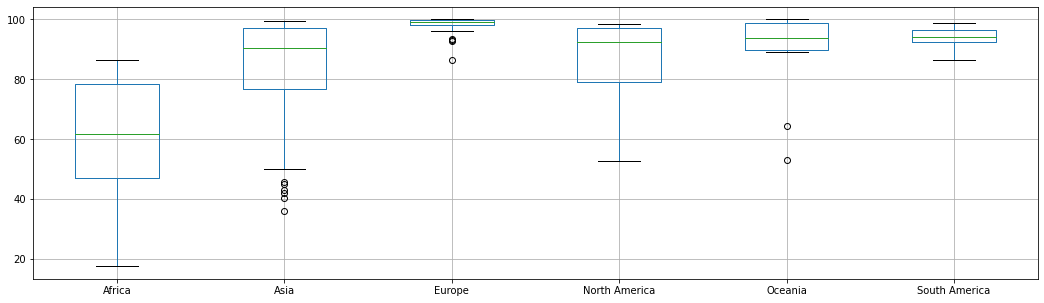

In [6]:
pivot_literacy = pd.DataFrame(literacy_by_continent.pivot(columns = 'Continent',\
                                        values = 'Literacy').reset_index())
pivot_literacy.drop(pivot_literacy.columns[[0]], axis=1, inplace=True)
display(pd.DataFrame(pivot_literacy.describe()))
boxplot_pivot_literacy = pivot_literacy.boxplot(column=['Africa', 'Asia', 'Europe', 'North America', 'Oceania', 'South America'])

<AxesSubplot:title={'center':'Literacy distribution'}, ylabel='Frequency'>

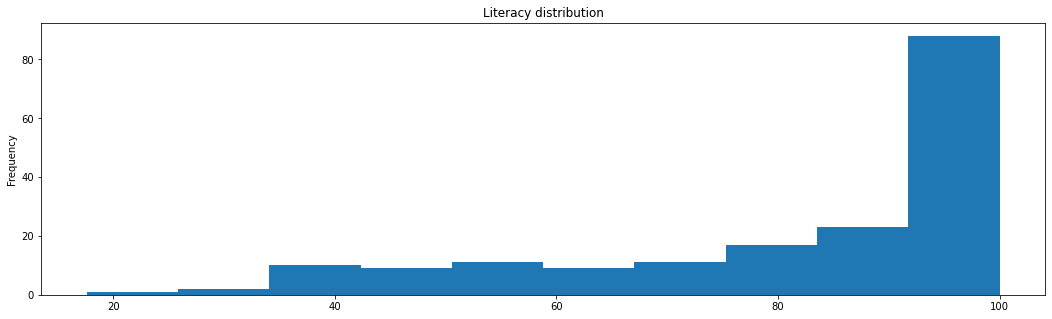

In [7]:
# Распределение показателей образованности населения Земли
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world['Literacy'].plot(kind='hist', 
                                title='Literacy distribution',
                               xlabel='Literacy',
                               ylabel='Frequency')

<AxesSubplot:title={'center':'GDP distribution'}, ylabel='Frequency'>

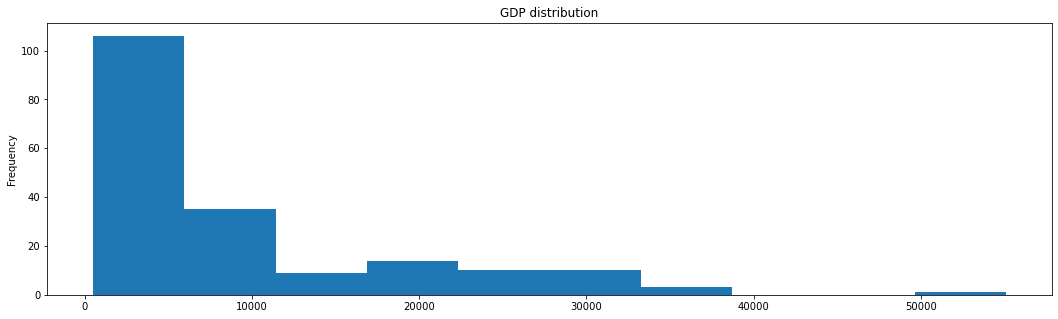

In [8]:
# Распределение показателей ВВП
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world['GDP'].plot(kind='hist', 
                                title='GDP distribution',
                               xlabel='GDP',
                               ylabel='Frequency')

<ipython-input-9-ab50263d6cfb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_hist_lit_gdp['GDP'] = df_hist_lit_gdp['GDP'] / 1000


<AxesSubplot:title={'center':'Literacy & GDP distribution'}, ylabel='Frequency'>

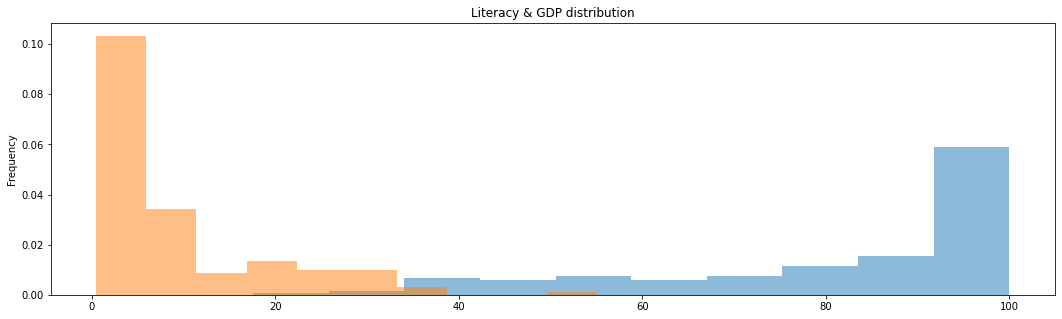

In [9]:
# сравнение распределения показателей образованности населения и ВВП
df_hist_lit_gdp = countries_world[['Country', 'GDP', 'Literacy']]
df_hist_lit_gdp['GDP'] = df_hist_lit_gdp['GDP'] / 1000

#sns.set(rc={'figure.figsize':(12.0,5.5)})
df_hist_lit_gdp.Literacy.plot(kind='hist', 
                         title='Literacy & GDP distribution',
                         xlabel='Literacy',
                         ylabel='Frequency',
                         alpha = 0.5,
                         density = True)

df_hist_lit_gdp.GDP.plot(kind='hist', 
                        title='Literacy & GDP distribution',
                        xlabel='GDP',
                        ylabel='Frequency',
                        alpha = 0.5,
                        density = True)

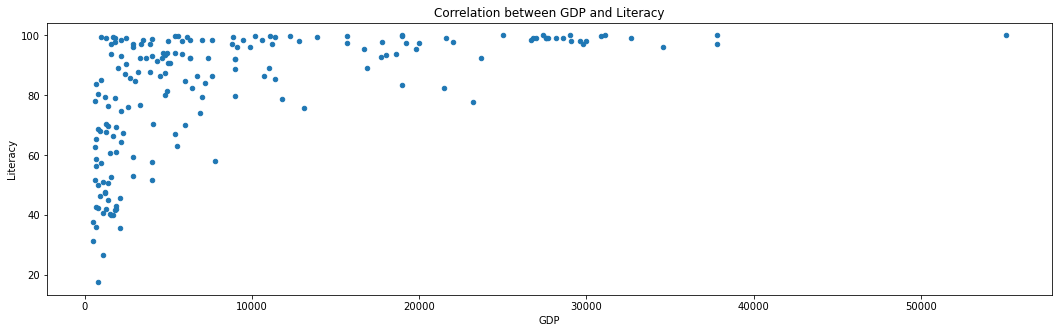

In [10]:
# Взаимосвязь показателей ВВП (дол. США на душу населения) и показателей уровня образованности населения
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world.plot(kind='scatter', 
                        x='GDP', 
                        y='Literacy', 
                    title='Correlation between GDP and Literacy')
plt.show()

<AxesSubplot:title={'center':'Correlation between GDP and Literacy and Population'}, xlabel='GDP', ylabel='Literacy'>

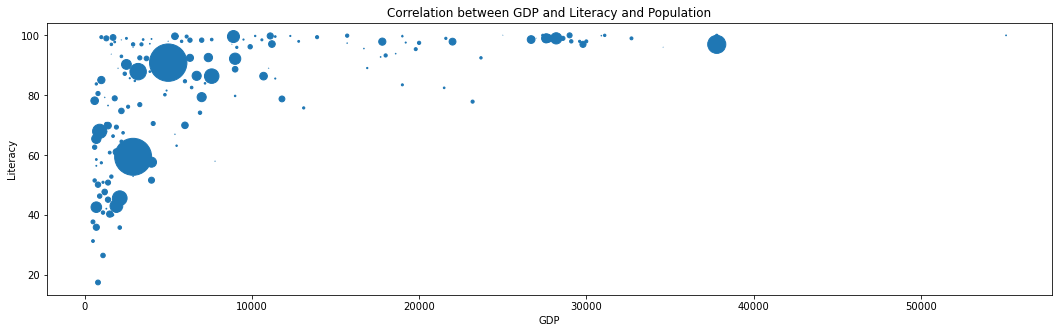

In [11]:
# Взаимосвязь показателей ВВП (дол. США на душу населения) и показателей уровня образованности населения и общей популяции 
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world.plot(kind='scatter', 
                        x='GDP', 
                        y='Literacy',
                        s='Population',# / 20,#*20,
                    title='Correlation between GDP and Literacy and Population')

<AxesSubplot:>

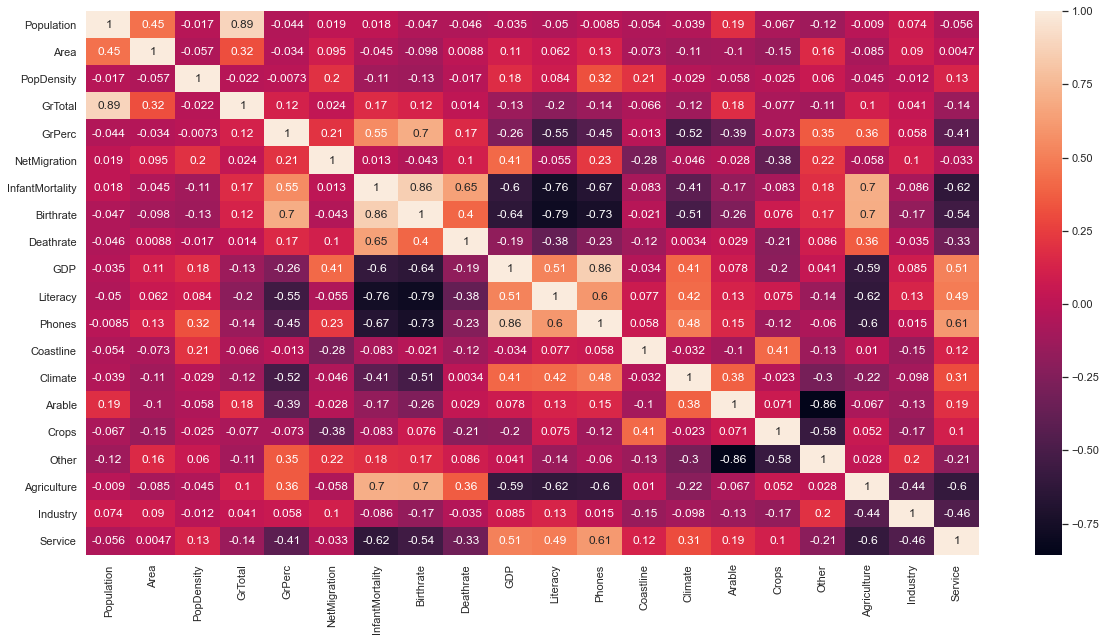

In [7]:
sns.set(rc={'figure.figsize':(20.0,10.0)})
sns.heatmap(countries_world.corr(), annot=True)

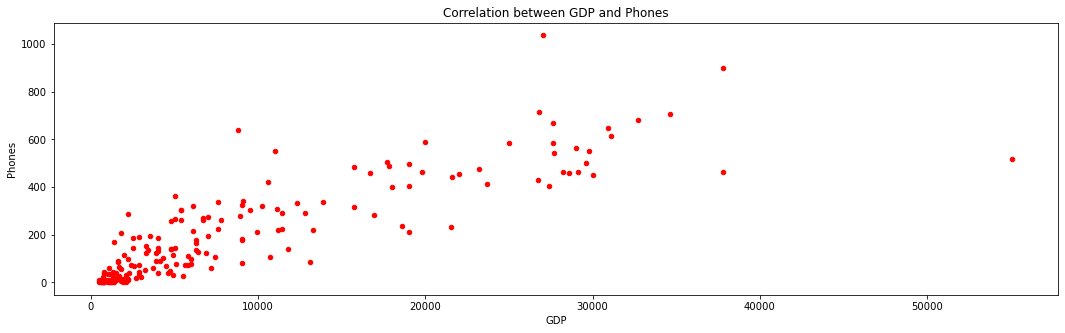

In [4]:
# Взаимосвязь показателей ВВП (дол. США на душу населения) и показателем уровня обеспеченности телефонной связью
#sns.set(rc={'figure.figsize':(12.0,5.5)})
countries_world.plot(kind='scatter', 
                        x='GDP', 
                        y='Phones', 
                    title='Correlation between GDP and Phones',
                    color='red')
plt.show()

Text(0.5, 1.0, 'Correlation between GDP and Phones')

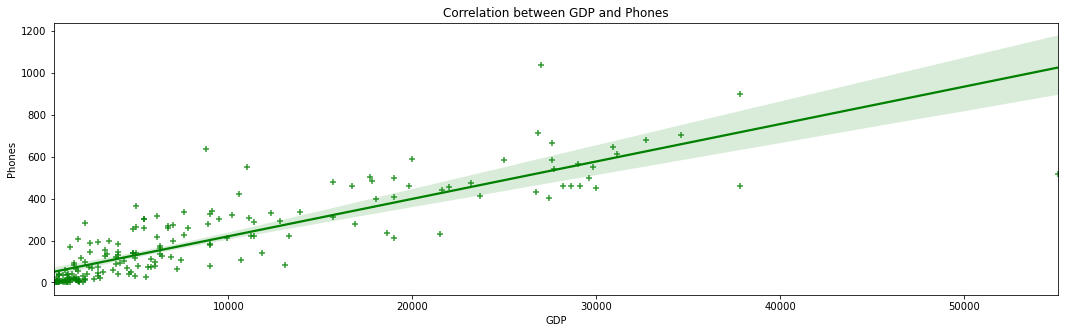

In [5]:
#sns.set(rc={'figure.figsize':(12.0,5.5)})
sns.regplot(data=countries_world, x='GDP', y='Phones', color='green', marker='+')
plt.title('Correlation between GDP and Phones')

### Береговая линия, как отношение побережья к площади

In [53]:
# Страна с максимальной береговой линией
coastline_max = countries_world.query('Coastline == {}'.format(countries_world['Coastline'].max()))[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Coastline']]
coastline_max

,Country,NativeName,Code,Continent,Region,Coastline
85,Federated States of Micronesia,Federated States of Micronesia,FSM,Oceania,Oceania,870.66


In [55]:
# Страны без береговой линии
coastline_min = countries_world.query('Coastline == {}'.format(countries_world['Coastline'].min()))[['Country', 'NativeName', 'Code', 'Continent', 'Region', 'Coastline']]
coastline_min.head()

,Country,NativeName,Code,Continent,Region,Coastline
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,0.0
8,Luxembourg,Letzebuerg,LUX,Europe,Western Europe,0.0
14,Switzerland,Schweizerische Eidgenossenschaft,CHE,Europe,Western Europe,0.0
15,Austria,Republik Osterreich,AUT,Europe,Western Europe,0.0
23,Ethiopia,ኢትዮጵያ,ETH,Africa,Sub-Saharan Africa,0.0


In [56]:
# Страны с максимальной береговой линией по континентам
series_index_max_coastline_continents = countries_world.groupby('Continent').idxmax()['Coastline']
countries_max_coastline_continents = countries_world.loc[countries_world.index.isin(series_index_max_coastline_continents)]\
                                                      .sort_values(by='Coastline', ascending=False)
countries_max_coastline_continents = countries_max_coastline_continents[['Country', 'NativeName', 'Code', 'Continent', 'Coastline']]
countries_max_coastline_continents

,Country,NativeName,Code,Continent,Coastline
85,Federated States of Micronesia,Federated States of Micronesia,FSM,Oceania,870.66
123,Maldives,ދިވެހިރާއްޖޭގެ ޖުމުހޫރިއްޔާ,MDV,Asia,214.67
52,Monaco,Principaute de Monaco,MCO,Europe,205.00
185,Seychelles,Republique des Seychelles,SYC,Africa,107.91
100,Saint Kitts and Nevis,Federation of Saint Kitts and Nevis,KNA,South America,51.72
102,Grenada,Grenada,GRD,North America,35.17


In [6]:
countries_world.head()

,Country,NativeName,Code,Continent,Region,Population,Area,PopDensity,GrTotal,GrPerc,...,Literacy,Phones,Coastline,Climate,Arable,Crops,Other,Agriculture,Industry,Service
0,Canada,Canada,CAN,North America,Northern America,37.593,25860195.0,1.0,3.588,10.6,...,97.0,552.2,2.02,NaN,4.96,0.02,95.02,0.022,0.294,0.684
1,Japan,日本,JPN,Asia,Asia,126.265,978589.0,129.0,-1.805,-1.4,...,99.0,461.2,7.87,3.0,12.19,0.96,86.85,0.017,0.258,0.725
2,Norway,Kongeriket Norge,NOR,Europe,Western Europe,5.348,838644.0,6.0,0.459,9.4,...,100.0,461.7,7.77,3.0,2.87,0.00,97.13,0.021,0.415,0.564
3,Ireland,Eire,IRL,Europe,Western Europe,4.934,182024.0,27.0,0.374,8.2,...,98.0,500.5,2.06,3.0,15.20,0.03,84.77,0.050,0.460,0.490
4,Hungary,Magyarorszag,HUN,Europe,Eastern Europe,9.771,240947.0,41.0,-0.229,-2.3,...,99.4,336.2,0.00,3.0,50.09,2.06,47.85,0.037,0.312,0.651


# ------------------------------------------------------------------------------------------

# ====================================================

# Черновики

In [37]:
# Страны с максимальной популяцией по континентам в 2019г. (млн. человек)
countries_max_population_continents = population_2019.groupby('Continent').max()['Pop2019'].reset_index().sort_values('Pop2019', ascending=False)
countries_max_population_continents.merge(population_2019[['Country', 'NativeName', 'Code', 'Pop2019']], how='left', on='Pop2019')

,Continent,Pop2019,Country,NativeName,Code
0,Asia,1397.715,People's Republic of China,中华人民共和国,CHN
1,North America,328.240,United States of America,United States of America,USA
2,South America,211.050,Brazil,Republica Federativa do Brasil,BRA
3,Africa,200.964,Nigeria,Nijeriya,NGA
4,Europe,144.406,Russia,Россия,RUS
5,Oceania,25.366,Australia,Australia,AUS


In [59]:
max_populations_continents = population_2019.groupby(['Continent'], as_index = False).max()['Pop2019']
countries_max_populations_continents = population_2019.loc[population_2019['Pop2019'].isin(max_populations_continents)]\
                                                      .sort_values(by='Pop2019', ascending=False)
countries_max_populations_continents

,Country,NativeName,Code,Continent,Pop2019
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715
6,United States of America,United States of America,USA,North America,328.240
28,Brazil,Republica Federativa do Brasil,BRA,South America,211.050
180,Nigeria,Nijeriya,NGA,Africa,200.964
29,Russia,Россия,RUS,Europe,144.406
68,Australia,Australia,AUS,Oceania,25.366


In [82]:
population_2019

,Country,NativeName,Code,Continent,Pop2019
0,Canada,Canada,CAN,North America,37.593
1,Japan,日本,JPN,Asia,126.265
2,Norway,Kongeriket Norge,NOR,Europe,5.348
3,Ireland,Eire,IRL,Europe,4.934
4,Hungary,Magyarorszag,HUN,Europe,9.771
...,...,...,...,...,...
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,15.443
188,Sudan,جمهورية السودان,SDN,Africa,42.813
189,Eswatini,Umbuso weSwatini,SWZ,Africa,1.148
190,Kingdom of the Netherlands,Koninkrijk der Nederlanden,NLD,Europe,17.345


In [83]:
df = population_2019.groupby(['Continent'], as_index = True).max()['Pop2019']
df

Continent
Africa            200.964
Asia             1397.715
Europe            144.406
North America     328.240
Oceania            25.366
South America     211.050
Name: Pop2019, dtype: float64

In [ ]:
fltr_world_happy = world_happy.loc[~world_happy['Country'].isin(df1)]

In [ ]:
df10 = df[df[]]

In [84]:
dfgrby = population_2019.loc[population_2019['Pop2019'].isin(df)].sort_values(by='Pop2019', ascending=False)
dfgrby

,Country,NativeName,Code,Continent,Pop2019
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715
6,United States of America,United States of America,USA,North America,328.240
28,Brazil,Republica Federativa do Brasil,BRA,South America,211.050
180,Nigeria,Nijeriya,NGA,Africa,200.964
29,Russia,Россия,RUS,Europe,144.406
68,Australia,Australia,AUS,Oceania,25.366


In [ ]:
df1 = df[df['Year'] < 5]['Country']

In [39]:
population_2019.query('Pop2019 == {}'.format(population_2019['Pop2019'].max()))[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]

,Country,NativeName,Code,Continent,Pop2019
27,People's Republic of China,中华人民共和国,CHN,Asia,1397.715


In [46]:
cmpc = pd.DataFrame(population_2019.groupby(['Continent'], as_index = False).max()['Pop2019'])#.sort_values('Pop2019', ascending=False)[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]
cmpc

,Pop2019
0,200.964
1,1397.715
2,144.406
3,328.240
4,25.366
5,211.050


In [40]:
population_2019.groupby('Continent').query('Pop2019 == {}'.format(population_2019['Pop2019'].min()))[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]

AttributeError: 'DataFrameGroupBy' object has no attribute 'query'

In [41]:
population_2019.query('Pop2019 == {}'.format(population_2019.groupby('Continent').min()['Pop2019']))[['Country', 'NativeName', 'Code', 'Continent', 'Pop2019']]

ValueError: multi-line expressions are only valid in the context of data, use DataFrame.eval

In [127]:
data_pivot = pd.DataFrame(growth.pivot(index = ['Country', 'NativeName', 'Code'], columns = 'Continent', values = 'Value').reset_index())
data_pivot

KeyError: 'Value'

In [115]:
results = growth.groupby('Continent').agg({'GrTotal': 'min', 'Country': 'Value'})
results

AttributeError: 'SeriesGroupBy' object has no attribute 'Value'

In [123]:
results = growth.groupby('Continent').agg({'GrTotal': 'min', 'Country': ['max', 'min']})
results

GrTotal                   Country                     
                  min                       max                  min
Continent                                                           
Africa          0.008                    Zambia              Algeria
Asia           -4.293                     Yemen          Afghanistan
Europe         -1.485            United Kingdom              Albania
North America   0.003  United States of America  Antigua and Barbuda
Oceania         0.000                   Vanuatu            Australia
South America   0.001                 Venezuela            Argentina

In [108]:
countries_min_growths_continents[(countries_min_growths_continents.Continent == 'Oceania') |\
                                      (countries_min_growths_continents.GrTotal.min())]

TypeError: Cannot perform 'or_' with a dtyped [bool] array and scalar of type [bool]

In [114]:
growth

,Country,NativeName,Code,Continent,Gr2011,Gr2012,Gr2013,Gr2014,Gr2015,Gr2016,Gr2017,Gr2018,Gr2019,GrTotal,GrPerc
0,Canada,Canada,CAN,North America,0.334,0.375,0.369,0.354,0.266,0.406,0.436,0.520,0.528,3.588,10.6
1,Japan,日本,JPN,Asia,-0.237,-0.204,-0.184,-0.169,-0.135,-0.146,-0.209,-0.257,-0.264,-1.805,-1.4
2,Norway,Kongeriket Norge,NOR,Europe,0.064,0.066,0.061,0.057,0.052,0.046,0.042,0.035,0.036,0.459,9.4
3,Ireland,Eire,IRL,Europe,0.020,0.020,0.024,0.034,0.044,0.053,0.052,0.060,0.067,0.374,8.2
4,Hungary,Magyarorszag,HUN,Europe,-0.028,-0.052,-0.027,-0.027,-0.023,-0.029,-0.026,-0.012,-0.005,-0.229,-2.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,Somalia,Jamhuuriyadda Federaalka Soomaaliya,SOM,Africa,0.332,0.340,0.348,0.360,0.373,0.389,0.403,0.419,0.435,3.399,28.2
188,Sudan,جمهورية السودان,SDN,Africa,0.805,0.844,0.879,0.905,0.925,0.944,0.966,0.989,1.011,8.268,23.9
189,Eswatini,Umbuso weSwatini,SWZ,Africa,0.007,0.007,0.008,0.008,0.009,0.010,0.011,0.011,0.012,0.083,7.8
190,Kingdom of the Netherlands,Koninkrijk der Nederlanden,NLD,Europe,0.078,0.062,0.049,0.061,0.075,0.090,0.101,0.101,0.113,0.730,4.4


In [139]:
a = pd.DataFrame(growth.groupby('Continent').min()['GrTotal'].reset_index())#[['Country']]
a

,Continent,GrTotal
0,Africa,0.008
1,Asia,-4.293
2,Europe,-1.485
3,North America,0.003
4,Oceania,0.000
5,South America,0.001


In [ ]:
df = pd.read_csv('population_2021.csv')
df

In [ ]:
df.loc[df.Country == 'Russia']

In [ ]:
RUS = df.loc[df.Country == 'Russia']
USA =  df.loc[df.Country == 'United States of America']
print(USA['Pop_2021'].sum() / RUS['Pop_2021'].sum())

In [ ]:
df1 = df.groupby('Continent').sum().sort_values('Pop_2021', ascending=False)
df1

In [ ]:
df1.Pop_2021.sum()

In [ ]:
df1.Male_Pop_2021.sum()

In [ ]:
df1.Female_Pop_2021.sum()

In [ ]:
df1.Male_Pop_2021.sum() - df1.Female_Pop_2021.sum()

In [ ]:
population = pd.read_csv('countries_general_info_historical.24-10-2021.csv')
population.head()

In [ ]:
population.drop(population.columns[[1, 2, 3, 5, 6]], axis=1, inplace=True)
population.rename(columns = {
    population.columns[0]: 'Country',
    population.columns[1]: 'Code',
    population.columns[2]: '2010',
    population.columns[3]: '2011',
    population.columns[4]: '2012',
    population.columns[5]: '2013',
    population.columns[6]: '2014',
    population.columns[7]: '2015',
    population.columns[8]: '2016',
    population.columns[9]: '2017',
    population.columns[10]: '2018',
    population.columns[11]: '2019',
}, inplace = True)
population['2010'] = round(population['2010'] / 1000000, 3)
population['2011'] = round(population['2011'] / 1000000, 3)
population['2012'] = round(population['2012'] / 1000000, 3)
population['2013'] = round(population['2013'] / 1000000, 3)
population['2014'] = round(population['2014'] / 1000000, 3)
population['2015'] = round(population['2015'] / 1000000, 3)
population['2016'] = round(population['2016'] / 1000000, 3)
population['2017'] = round(population['2017'] / 1000000, 3)
population['2018'] = round(population['2018'] / 1000000, 3)
population['2019'] = round(population['2019'] / 1000000, 3)
population

In [ ]:
df = pd.read_csv('population_2021.csv')
df

In [ ]:
df['Country'] = df['Country'].apply(lambda x: 'United Kingdom' if x == 'United Kingdom of Great Britain and Northern Ireland' else x)
population['Country'] = population['Country'].apply(lambda x: 'China' if x == "People's Republic of China" else x)
df['Country'] = df['Country'].apply(lambda x: 'Moldova' if x == 'Republic of Moldova' else x)
df['Country'] = df['Country'].apply(lambda x: 'North Korea' if x == "Dem. People's Republic of Korea" else x)
df['Country'] = df['Country'].apply(lambda x: 'Federated States of Micronesia' if x == "Micronesia (Fed. States of)" else x)
df['Country'] = df['Country'].apply(lambda x: 'Venezuela' if x == "Venezuela (Bolivarian Republic of)" else x)
df['Country'] = df['Country'].apply(lambda x: 'Bolivia' if x == "Bolivia (Plurinational State of)" else x)
population['Country'] = population['Country'].apply(lambda x: 'Bahamas' if x == "The Bahamas" else x)
population['Country'] = population['Country'].apply(lambda x: 'Dominican Republic' if x == "Dominica" else x)
df['Country'] = df['Country'].apply(lambda x: 'Iran' if x == "Iran, Islamic Republic of..." else x)
df['Country'] = df['Country'].apply(lambda x: 'Laos' if x == "Lao People's Democratic Republic" else x)
df['Country'] = df['Country'].apply(lambda x: 'Syria' if x == "Syrian Arab Republic" else x)
df['Country'] = df['Country'].apply(lambda x: 'Vietnam' if x == "Viet Nam" else x)
df['Country'] = df['Country'].apply(lambda x: 'Brunei' if x == "Brunei Darussalam" else x)
df['Country'] = df['Country'].apply(lambda x: 'Tanzania' if x == "United Republic of Tanzania" else x)
population['Country'] = population['Country'].apply(lambda x: 'Democratic Republic of the Congo' if x == "Republic of the Congo" else x)
population['Country'] = population['Country'].apply(lambda x: 'Gambia' if x == "The Gambia" else x)
df['Country'] = df['Country'].apply(lambda x: "Cote d'Ivoire" if x == "Côte d'Ivoire" else x)
population['Country'] = population['Country'].apply(lambda x: 'Cabo Verde' if x == "Cape Verde" else x)
population['Country'] = population['Country'].apply(lambda x: 'Netherlands' if x == "Kingdom of the Netherlands" else x)
population['Country'] = population['Country'].apply(lambda x: 'Denmark' if x == "Danish Realm" else x)

In [ ]:
population = population.merge(df, how='left', on='Country')
population.drop(population.columns[[-4, -3, -2]], axis=1, inplace=True)
#population.rename(columns = {
#    population.columns[12]: '2021'
#}, inplace = True)
#population['2021'] = round(population['2021'] / 1000000, 3)
population.loc[population.Country.isin(['Andorra', 'Monaco', 'San Marino', 'Liechtenstein']), 'Continent'] = 'Europe'
population.loc[population.Country.isin(['Tuvalu', 'Palau', 'Nauru', 'Marshall Islands']), 'Continent'] = 'Oceania'
population.loc[population.Country == 'Saint Kitts and Nevis' , 'Continent'] = 'South America'
#population['2021'].fillna(population['2019'], inplace=True)
population = population[['Country', 'Code', 'Continent', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019']]#, '2021']]
population

In [ ]:
# Страны с максимальной популяцией по континентам в 2019г. (млн. человек)
countries_max_population_continents = population_2019.groupby('Continent').max()['Pop2019'].reset_index().sort_values('Pop2019', ascending=False)
countries_max_population_continents.merge(population_2019[['Country', 'NativeName', 'Code', 'Pop2019']], how='left', on='Pop2019')